In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve


Bad key "“backend" on line 1 in
/Users/bhkash/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [255]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, X, y,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.05, 1.0, 8), scoring = "f1", random_state =1):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y,
                       train_sizes=train_sizes, scoring = scoring,
                       return_times=True, random_state = random_state, cv=cv, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    print("Train Score Mean " + str(train_scores_mean[-1]))
    print("Test Score Mean " + str(test_scores_mean[-1]))

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


In [257]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, X, y,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.05, 1.0, 8), scoring = "f1", random_state =1):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, ax = plt.subplots( figsize=(6, 5))

    ax.set_title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y,
                       train_sizes=train_sizes, scoring = scoring,
                       return_times=True, random_state = random_state, cv=cv, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    print("Train Score Mean " + str(train_scores_mean[-1]))
    print("Test Score Mean " + str(test_scores_mean[-1]))

    # Plot learning curve
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    ax.legend(loc="best")

#     # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, 'o-')
#     axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
#                          fit_times_mean + fit_times_std, alpha=0.1)
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     axes[2].grid()
#     axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
#     axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1)
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

    return plt


In [244]:
# https://scikit-learn.org/stable/modules/model_evaluation.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

def plot_validation_curve(estimator, X, y, param_name,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=-1, param_range=np.linspace(.1, 1.0, 5), scoring = "f1", random_state = 1):

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range, scoring=scoring, cv = cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.plot(param_range, train_scores_mean, label="Training score", color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="g")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
    array = sorted(zip(param_range, test_scores_mean), key = lambda x:x[1], reverse = True)
    return array

In [245]:
# https://scikit-learn.org/stable/modules/model_evaluation.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

def plot_validation_curve_log(estimator, X, y, param_name,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=-1, param_range=np.linspace(.1, 1.0, 5), scoring = "f1", random_state = 1):

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range, scoring=scoring, cv = cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="g")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
    array = list(zip(param_range, test_scores_mean))
    return array

In [246]:
# https://scikit-learn.org/stable/modules/model_evaluation.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedShuffleSplit

digits = load_digits()
X, y = digits.data, digits.target
#StratifiedShuffleSplit(n_splits = 1,test_size=0.2, train_size = 0.8, random_state = 1)
def plot_validation_curve_nn(estimator, X, y, param_name,title= "Validation Curve", axes=None, ylim=None,
                             cv=None,
                        n_jobs=-1, param_range=np.linspace(.1, 1.0, 5), scoring = "f1", random_state = 1):

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range, scoring=scoring, cv = cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.plot(param_range, train_scores_mean, label="Training score", color="r")

    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="g")

    plt.legend(loc="best")
    plt.grid()
    plt.show()
    array = sorted(zip(param_range, test_scores_mean), key = lambda x:x[1], reverse = True)
    return array

In [6]:
data = pd.read_csv("BreastCancer.csv")

#data = data_red
data.groupby('diagnosis').size()


diagnosis
B    357
M    212
dtype: int64

In [7]:
data["label"] = 0
data.label[data.diagnosis == 'B'] = 0
data.label[data.diagnosis == 'M'] = 1
print(data.groupby('label').size())

data.head()

label
0    357
1    212
dtype: int64


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,label
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


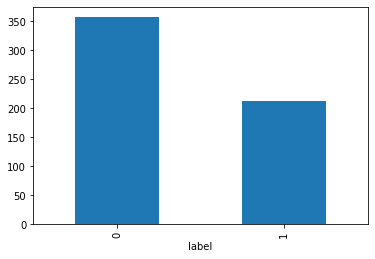

In [8]:
pd.Series(data.groupby('label').size()).plot(kind="bar")
data = data.drop(columns =["diagnosis", "Unnamed: 32", 'id'])

In [9]:
data.shape

(569, 31)

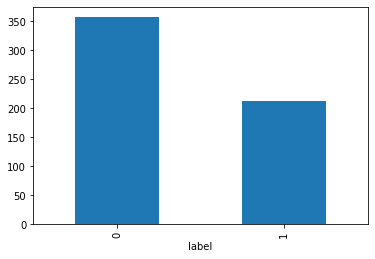

In [10]:
pd.Series(data.groupby('label').size()).plot(kind="bar")

In [11]:
abs(data.corr()["label"]).sort_values(ascending =False)

label                      1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

Text(0.5, 1.02, 'Fig. 1.2b - Breast Cancer')

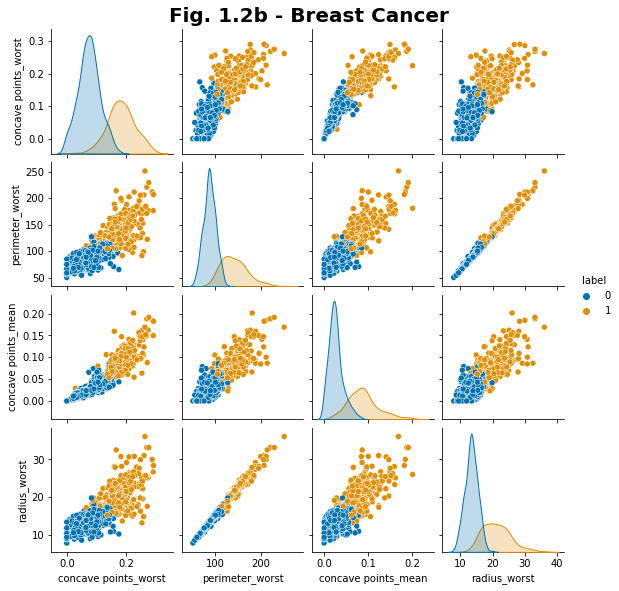

In [242]:
g =sns.pairplot(data[["concave points_worst", "perimeter_worst", "concave points_mean", "radius_worst", "label"]], hue="label", height = 2, palette = 'colorblind')

g.fig.suptitle("Fig. 1.2b - Breast Cancer", y = 1.02, fontsize=20, fontweight ='heavy')

In [12]:
X = data.iloc[:,:-1]
y = data['label']
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.2, stratify = data['label'], random_state = 1)
print(len(X_train),' samples in training data\n',
      len(X_test),' samples in test data\n', )

455  samples in training data
 114  samples in test data



# Standardization

In [13]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_original = X_train
X_test_original = X_test
X_train = X_train_scaled
X_test = X_test_scaled

# Decision Tree

In [247]:
#https://stackoverflow.com/questions/31161637/grid-search-cross-validation-in-sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y, verbose = 0):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini', 'entropy'],'max_depth': np.arange(1, 40, 3)}
    # decision tree model
    dtree_model=DecisionTreeClassifier(random_state = 1)
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, verbose = verbose, scoring="balanced_accuracy")
    #fit model to data
    dtree_gscv.fit(X, y)
    if verbose:
        print(dtree_gscv.cv_results_)
    
    return dtree_gscv

In [248]:
results = dtree_grid_search(X_train, y_train)
results

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37])},
             scoring='balanced_accuracy')

In [249]:
results.best_params_


{'criterion': 'entropy', 'max_depth': 4}

In [250]:
results.cv_results_

{'mean_fit_time': array([0.0093123 , 0.00485454, 0.00488944, 0.00422187, 0.00371637,
        0.00354524, 0.00366268, 0.00396247, 0.00357628, 0.00365744,
        0.00368428, 0.00353932, 0.00370283, 0.00178514, 0.00397706,
        0.0041398 , 0.00396657, 0.00394931, 0.00416346, 0.00455394,
        0.00527711, 0.00540442, 0.00547676, 0.00563455, 0.00511618,
        0.00454721]),
 'std_fit_time': array([0.01391492, 0.00016097, 0.00048115, 0.00043918, 0.00082861,
        0.00038591, 0.00050342, 0.0004115 , 0.00049341, 0.00032319,
        0.00037071, 0.0005312 , 0.00056815, 0.00014345, 0.00019408,
        0.00038355, 0.00033288, 0.00016925, 0.00041844, 0.00062595,
        0.00070656, 0.00049662, 0.00040518, 0.00039918, 0.00040861,
        0.00055066]),
 'mean_score_time': array([0.00348754, 0.00173306, 0.00080738, 0.00062737, 0.00055966,
        0.00059276, 0.00055118, 0.00061355, 0.00078688, 0.00058241,
        0.00059319, 0.00056257, 0.00062251, 0.00058084, 0.00055361,
        0.00059733, 

/usr/local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Train Score Mean 0.9803363651521944
Test Score Mean 0.9308501333160646


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

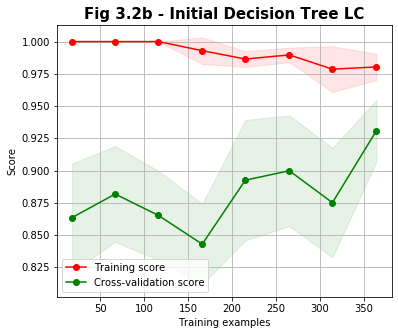

In [266]:
params = results.best_params_
mod_dt = DecisionTreeClassifier(random_state =1)
mod_dt.set_params(**params)
plot_learning_curve(mod_dt, X_train, y_train, "Fig 3.2b - Initial Decision Tree LC")

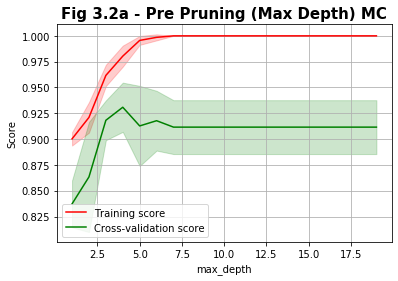

[(4, 0.9308501333160646),
 (3, 0.9182106782106783),
 (6, 0.9178067765567766),
 (5, 0.9127546186863571),
 (7, 0.9115882891618184),
 (8, 0.9115882891618184),
 (9, 0.9115882891618184),
 (10, 0.9115882891618184),
 (11, 0.9115882891618184),
 (12, 0.9115882891618184),
 (13, 0.9115882891618184),
 (14, 0.9115882891618184),
 (15, 0.9115882891618184),
 (16, 0.9115882891618184),
 (17, 0.9115882891618184),
 (18, 0.9115882891618184),
 (19, 0.9115882891618184),
 (2, 0.8633445682477052),
 (1, 0.8372589860421288)]

In [265]:
mod_dt = DecisionTreeClassifier(random_state =1, criterion = 'entropy')
plot_validation_curve(mod_dt, X_train, y_train, param_name = "max_depth", param_range = np.arange(1,20)
                     , title = "Fig 3.2a - Pre Pruning (Max Depth) MC")

Train Score Mean 0.9803363651521944
Test Score Mean 0.9308501333160646


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

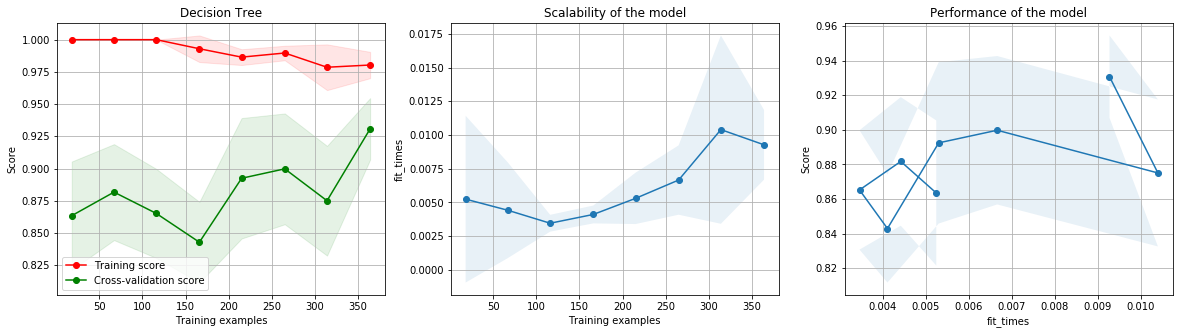

In [15]:
mod_dt = DecisionTreeClassifier(random_state =1, criterion = 'entropy', max_depth = 4)
plot_learning_curve(mod_dt, X_train, y_train, "Decision Tree")

In [79]:
mod_dt.fit(X_train, y_train)
for name, importance in sorted(zip(X_train_original.columns, mod_dt.feature_importances_), key = lambda x:x[1], reverse = True):
    print(name, importance)

perimeter_worst 0.5937475731545566
concave points_worst 0.1803207099873657
texture_worst 0.07977667740823347
radius_worst 0.026827126381496917
area_se 0.026223984608099146
texture_mean 0.020881885237086173
smoothness_se 0.014961184407621042
concavity_worst 0.013245668800077071
concavity_mean 0.011942189752311415
fractal_dimension_se 0.011191115026066293
concave points_mean 0.010440942618543086
smoothness_worst 0.010440942618543086
radius_mean 0.0
perimeter_mean 0.0
area_mean 0.0
smoothness_mean 0.0
compactness_mean 0.0
symmetry_mean 0.0
fractal_dimension_mean 0.0
radius_se 0.0
texture_se 0.0
perimeter_se 0.0
compactness_se 0.0
concavity_se 0.0
concave points_se 0.0
symmetry_se 0.0
area_worst 0.0
compactness_worst 0.0
symmetry_worst 0.0
fractal_dimension_worst 0.0


The balanced accuracy of the Decision Tree is 0.917


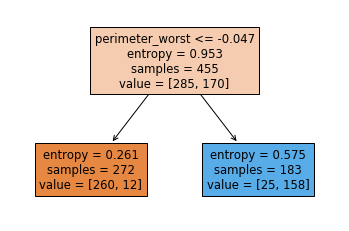

In [80]:
mod_dt = DecisionTreeClassifier(random_state =1, criterion = 'entropy', max_depth = 1)
mod_dt.fit(X_train_scaled, y_train)
plot_tree(mod_dt, feature_names = list(X_train_original.columns), filled = True);
prediction=mod_dt.predict(X_test)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))

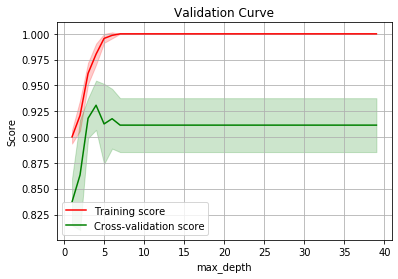

[(4, 0.9308501333160646),
 (3, 0.9182106782106783),
 (6, 0.9178067765567766),
 (5, 0.9127546186863571),
 (7, 0.9115882891618184),
 (8, 0.9115882891618184),
 (9, 0.9115882891618184),
 (10, 0.9115882891618184),
 (11, 0.9115882891618184),
 (12, 0.9115882891618184),
 (13, 0.9115882891618184),
 (14, 0.9115882891618184),
 (15, 0.9115882891618184),
 (16, 0.9115882891618184),
 (17, 0.9115882891618184),
 (18, 0.9115882891618184),
 (19, 0.9115882891618184),
 (20, 0.9115882891618184),
 (21, 0.9115882891618184),
 (22, 0.9115882891618184),
 (23, 0.9115882891618184),
 (24, 0.9115882891618184),
 (25, 0.9115882891618184),
 (26, 0.9115882891618184),
 (27, 0.9115882891618184),
 (28, 0.9115882891618184),
 (29, 0.9115882891618184),
 (30, 0.9115882891618184),
 (31, 0.9115882891618184),
 (32, 0.9115882891618184),
 (33, 0.9115882891618184),
 (34, 0.9115882891618184),
 (35, 0.9115882891618184),
 (36, 0.9115882891618184),
 (37, 0.9115882891618184),
 (38, 0.9115882891618184),
 (39, 0.9115882891618184),
 (2, 0.8

In [93]:
mod_dt = DecisionTreeClassifier(random_state =1, criterion = 'entropy')
plot_validation_curve(mod_dt, X_train, y_train, param_name = "max_depth", param_range = np.arange(1,40))

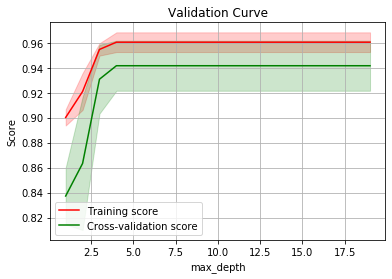

[(4, 0.9416651719976528),
 (5, 0.9416651719976528),
 (6, 0.9416651719976528),
 (7, 0.9416651719976528),
 (8, 0.9416651719976528),
 (9, 0.9416651719976528),
 (10, 0.9416651719976528),
 (11, 0.9416651719976528),
 (12, 0.9416651719976528),
 (13, 0.9416651719976528),
 (14, 0.9416651719976528),
 (15, 0.9416651719976528),
 (16, 0.9416651719976528),
 (17, 0.9416651719976528),
 (18, 0.9416651719976528),
 (19, 0.9416651719976528),
 (3, 0.9308666496901792),
 (2, 0.8633445682477052),
 (1, 0.8372589860421288)]

In [235]:
plot_validation_curve(mod_dt, X_train, y_train, param_name = "max_depth", param_range = np.arange(1,20))

Train Score Mean 0.960520836651288
Test Score Mean 0.9416651719976528


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

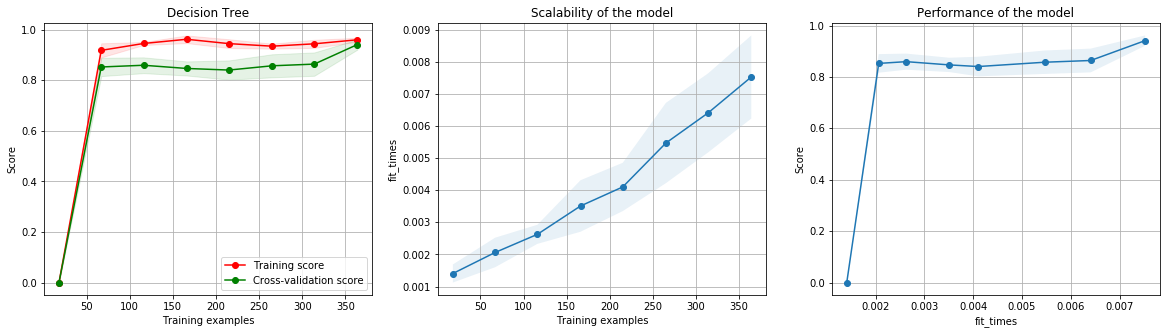

In [225]:
mod_dt = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.02 ,random_state =1, min_samples_split = 32)
plot_learning_curve(mod_dt, X_train, y_train, "Decision Tree")

Train Score Mean 0.960520836651288
Test Score Mean 0.9416651719976528


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

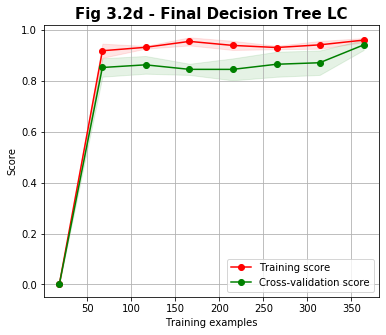

In [268]:
mod_dt = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.02, max_depth = 4 ,random_state =1,min_samples_leaf = 3, min_samples_split = 32)
plot_learning_curve(mod_dt, X_train, y_train, "Fig 3.2d - Final Decision Tree LC")

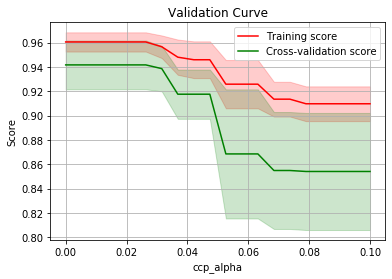

[(0.0, 0.9416651719976528),
 (0.005263157894736842, 0.9416651719976528),
 (0.010526315789473684, 0.9416651719976528),
 (0.015789473684210527, 0.9416651719976528),
 (0.021052631578947368, 0.9416651719976528),
 (0.02631578947368421, 0.9416651719976528),
 (0.031578947368421054, 0.938596118289213),
 (0.03684210526315789, 0.9175709204395748),
 (0.042105263157894736, 0.9175709204395748),
 (0.04736842105263158, 0.9175709204395748),
 (0.05263157894736842, 0.8684957353256145),
 (0.05789473684210526, 0.8684957353256145),
 (0.06315789473684211, 0.8684957353256145),
 (0.06842105263157895, 0.8548693616992409),
 (0.07368421052631578, 0.8548693616992409),
 (0.07894736842105263, 0.8540657087312044),
 (0.08421052631578947, 0.8540657087312044),
 (0.08947368421052632, 0.8540657087312044),
 (0.09473684210526316, 0.8540657087312044),
 (0.1, 0.8540657087312044)]

In [222]:

plot_validation_curve(mod_dt, X_train_scaled, y_train, param_name = "ccp_alpha", param_range = np.linspace(0, 0.1, 20))

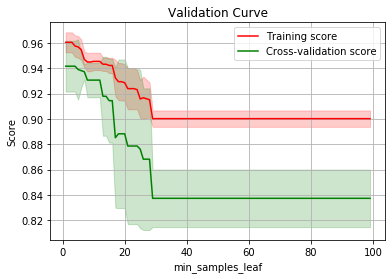

[(1, 0.9416651719976528),
 (2, 0.9416651719976528),
 (3, 0.9416651719976528),
 (4, 0.9416651719976528),
 (5, 0.9390897192813551),
 (6, 0.9381543605584526),
 (7, 0.9373027908585415),
 (8, 0.9306740029797537),
 (9, 0.9306740029797537),
 (10, 0.9306740029797537),
 (11, 0.9306740029797537),
 (12, 0.9306740029797537),
 (13, 0.9179070684217743),
 (14, 0.9179070684217743),
 (15, 0.9144348461995522),
 (16, 0.9144348461995522),
 (18, 0.8882458016843765),
 (19, 0.8882458016843765),
 (20, 0.8882458016843765),
 (17, 0.8851767479759367),
 (21, 0.8785839659355842),
 (22, 0.8785839659355842),
 (23, 0.8785839659355842),
 (24, 0.8785839659355842),
 (25, 0.8761392873265221),
 (26, 0.8681856833497201),
 (27, 0.8681856833497201),
 (28, 0.8681856833497201),
 (29, 0.8372589860421288),
 (30, 0.8372589860421288),
 (31, 0.8372589860421288),
 (32, 0.8372589860421288),
 (33, 0.8372589860421288),
 (34, 0.8372589860421288),
 (35, 0.8372589860421288),
 (36, 0.8372589860421288),
 (37, 0.8372589860421288),
 (38, 0.83

In [233]:
plot_validation_curve(mod_dt, X_train_scaled, y_train, param_name = "min_samples_leaf", param_range = np.arange(1, 100, 1))


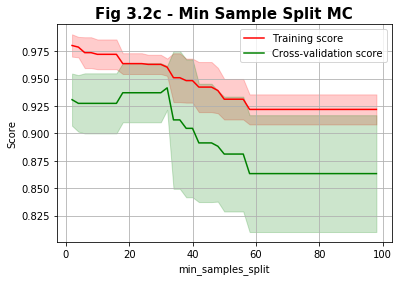

[(32, 0.9416651719976528),
 (18, 0.9371864075188883),
 (20, 0.9371864075188883),
 (22, 0.9371864075188883),
 (24, 0.9371864075188883),
 (26, 0.9371864075188883),
 (28, 0.9371864075188883),
 (30, 0.9371864075188883),
 (2, 0.9308501333160646),
 (6, 0.9274885659316606),
 (8, 0.9274885659316606),
 (10, 0.9274885659316606),
 (12, 0.9274885659316606),
 (14, 0.9274885659316606),
 (16, 0.9274885659316606),
 (4, 0.9274847487006799),
 (34, 0.9124070737740373),
 (36, 0.9124070737740373),
 (38, 0.9046776051750035),
 (40, 0.9046776051750035),
 (42, 0.8913818759243991),
 (44, 0.8913818759243991),
 (46, 0.8913818759243991),
 (48, 0.8883128222159593),
 (50, 0.8812017111048481),
 (52, 0.8812017111048481),
 (54, 0.8812017111048481),
 (56, 0.8812017111048481),
 (58, 0.8633445682477052),
 (60, 0.8633445682477052),
 (62, 0.8633445682477052),
 (64, 0.8633445682477052),
 (66, 0.8633445682477052),
 (68, 0.8633445682477052),
 (70, 0.8633445682477052),
 (72, 0.8633445682477052),
 (74, 0.8633445682477052),
 (76,

In [267]:
plot_validation_curve(mod_dt, X_train_scaled, y_train, param_name = "min_samples_split", param_range = np.arange(2, 100, 2)
                     , title = "Fig 3.2c - Min Sample Split MC")


The balanced accuracy of the Decision Tree is 0.911
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        77
           1       0.86      0.97      0.91        37

    accuracy                           0.94       114
   macro avg       0.92      0.95      0.93       114
weighted avg       0.94      0.94      0.94       114

Train Score Mean 0.960520836651288
Test Score Mean 0.9416651719976528


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

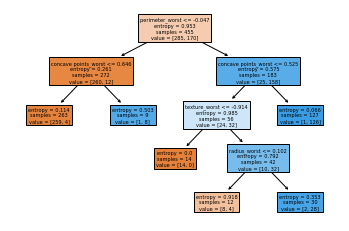

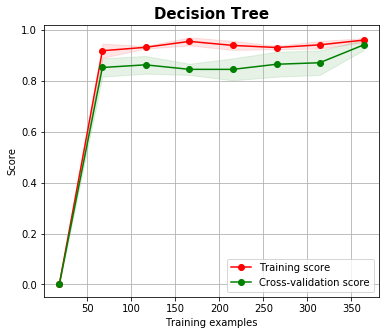

In [336]:
final_dt = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.02, max_depth = 4 ,min_samples_leaf = 3,random_state =1, min_samples_split = 32)

final_dt.fit(X_train_scaled, y_train)
plot_tree(final_dt, feature_names = list(X_train_original.columns), filled = True);
prediction=final_dt.predict(X_test)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.f1_score(prediction,y_test)))

print(classification_report(prediction,y_test))
plot_learning_curve(final_dt, X_train, y_train, "Decision Tree")

# Boosting

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

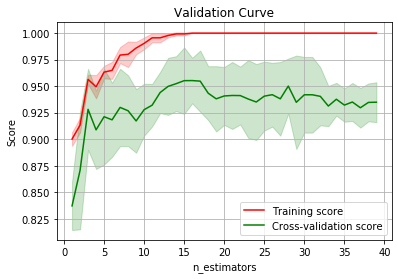

[(16, 0.9552988305227113),
 (15, 0.9552212201026951),
 (17, 0.9547715965626413),
 (14, 0.9523887058215417),
 (28, 0.9501315102807639),
 (13, 0.9498592829852134),
 (12, 0.9440468993921678),
 (18, 0.9433966187970814),
 (26, 0.9420037912464577),
 (30, 0.9419201102783192),
 (31, 0.9419201102783192),
 (21, 0.9412667432070417),
 (22, 0.9411709654115272),
 (20, 0.9408144591726681),
 (25, 0.9406238040566398),
 (32, 0.9404356712938803),
 (27, 0.9381123885315257),
 (19, 0.9381007549664266),
 (23, 0.937919841352677),
 (34, 0.9377224736048264),
 (24, 0.9351103593509211),
 (36, 0.9351035239270533),
 (39, 0.9349350062123524),
 (29, 0.9348329758672411),
 (38, 0.9347247360482654),
 (35, 0.9322130810366105),
 (11, 0.9321296331641028),
 (33, 0.9313053613053613),
 (7, 0.9300253667900726),
 (37, 0.9297016655114962),
 (3, 0.9282060462218495),
 (10, 0.9278871679909967),
 (8, 0.9268552036199095),
 (5, 0.9212438541850305),
 (6, 0.918338454784899),
 (9, 0.9172600587817978),
 (4, 0.9088749357899928),
 (2, 0.870

In [112]:
plot_validation_curve(boosted_mod_dt, X_train, y_train, param_name = "n_estimators", param_range = np.arange(1,40))

Train Score Mean 1.0
Test Score Mean 0.935740607431784


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

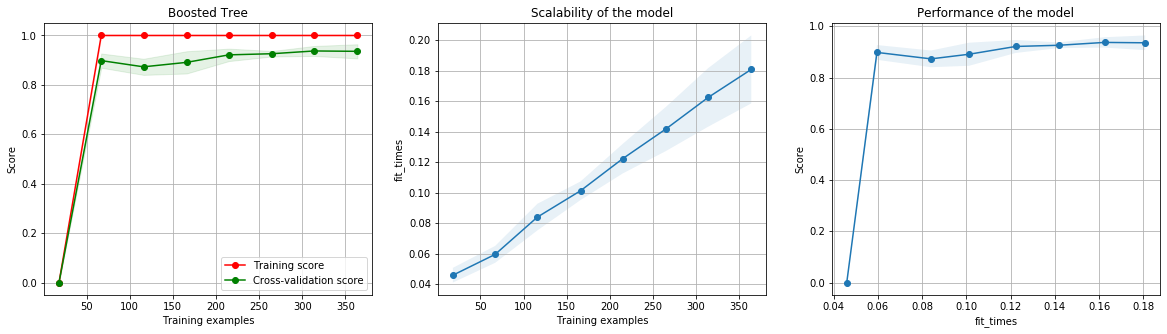

In [113]:
mod_dt = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.02, max_depth = 4 ,random_state =1, min_samples_split = 32)
boosted_mod_dt = AdaBoostClassifier(mod_dt, n_estimators = 22, learning_rate = 1.1, random_state =1)
plot_learning_curve(boosted_mod_dt, X_train, y_train, "Boosted Tree")

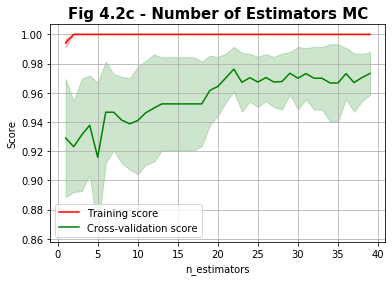

[(22, 0.9762032663929828),
 (29, 0.9733875314033348),
 (39, 0.973219464176444),
 (31, 0.9731303954535623),
 (36, 0.9731303954535623),
 (26, 0.9704061649437075),
 (38, 0.9704061649437075),
 (24, 0.9703146604639142),
 (21, 0.9702173682331716),
 (30, 0.9699644072129472),
 (32, 0.9699644072129472),
 (33, 0.9699644072129472),
 (28, 0.9676732456890491),
 (25, 0.9673332940042869),
 (27, 0.9673332940042869),
 (23, 0.9671486722232991),
 (37, 0.9669806049964084),
 (34, 0.9667010039495437),
 (35, 0.9667010039495437),
 (20, 0.9643350152919951),
 (19, 0.9616069675511596),
 (13, 0.9523803732499385),
 (14, 0.9523803732499385),
 (15, 0.9523803732499385),
 (16, 0.9523803732499385),
 (17, 0.9523803732499385),
 (18, 0.9523675875281974),
 (12, 0.949457474552392),
 (6, 0.9466853025840696),
 (7, 0.9466588801120064),
 (11, 0.9462873113822287),
 (8, 0.9412847690200058),
 (10, 0.9409768009768008),
 (9, 0.9387211894025651),
 (4, 0.9377388894384746),
 (3, 0.9310938680801695),
 (1, 0.9290068348891879),
 (2, 0.923

In [283]:
plot_validation_curve(boosted_mod_dt, X_train, y_train, param_name = "n_estimators", param_range = np.arange(1,40)
                     ,title ='Fig 4.2c - Number of Estimators MC')

Train Score Mean 1.0
Test Score Mean 0.9762032663929828


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

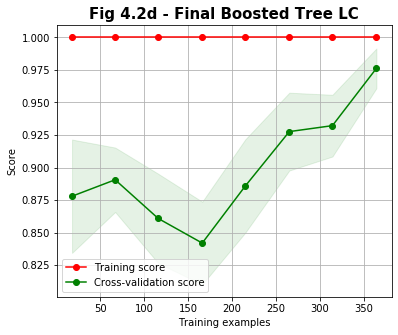

In [284]:
mod_dt = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.01105, max_depth =18 ,random_state =1, min_samples_split = 4)
boosted_mod_dt = AdaBoostClassifier(mod_dt, n_estimators = 22, learning_rate = 1.1, random_state =1)
plot_learning_curve(boosted_mod_dt, X_train, y_train, "Fig 4.2d - Final Boosted Tree LC")

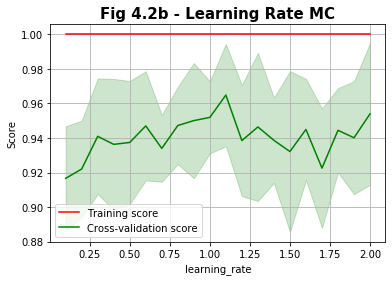

[(1.0999999999999999, 0.9648454699605594),
 (2.0, 0.9539849770754072),
 (0.9999999999999999, 0.951931329179869),
 (0.8999999999999999, 0.950066945096147),
 (0.7999999999999999, 0.9472315714721333),
 (0.6, 0.9470190660016181),
 (1.3, 0.9464087097643612),
 (1.5999999999999999, 0.9449617366169886),
 (1.8, 0.9444633895469506),
 (0.3, 0.9409729807798289),
 (1.9, 0.9401319822293216),
 (1.4, 0.9386676105874633),
 (1.2, 0.9385001631894756),
 (0.5, 0.9374286278477652),
 (0.4, 0.9363210298966301),
 (0.7, 0.9339865482775931),
 (1.5, 0.9321512336992214),
 (1.7, 0.9225624437943647),
 (0.2, 0.9220534226218134),
 (0.1, 0.9166393449545623)]

In [279]:
plot_validation_curve(boosted_mod_dt, X_train, y_train, param_name = "learning_rate", param_range = np.linspace(0.1, 2, 20)
                     ,title = "Fig 4.2b - Learning Rate MC")


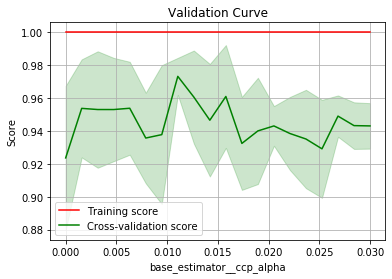

[(0.011052631578947368, 0.9732181917661171),
 (0.015789473684210527, 0.9609932096888618),
 (0.01263157894736842, 0.9606431811753031),
 (0.00631578947368421, 0.9538300813474242),
 (0.0015789473684210526, 0.9537570178567346),
 (0.003157894736842105, 0.9530541912715552),
 (0.004736842105263157, 0.9530460834373604),
 (0.026842105263157893, 0.9490513120671155),
 (0.014210526315789474, 0.9465584321081483),
 (0.028421052631578948, 0.943268434134217),
 (0.03, 0.9430901810147875),
 (0.020526315789473684, 0.9430778520995913),
 (0.01894736842105263, 0.9400506132977045),
 (0.022105263157894735, 0.9384684472498313),
 (0.009473684210526315, 0.9377853052280212),
 (0.007894736842105263, 0.9357133699923776),
 (0.02368421052631579, 0.9351298229585214),
 (0.017368421052631578, 0.9324466461553488),
 (0.02526315789473684, 0.9291518122400475),
 (0.0, 0.9236214018387656)]

In [190]:
plot_validation_curve(boosted_mod_dt, X_train, y_train, param_name = "base_estimator__ccp_alpha", param_range = np.linspace(0, 0.03, 20))


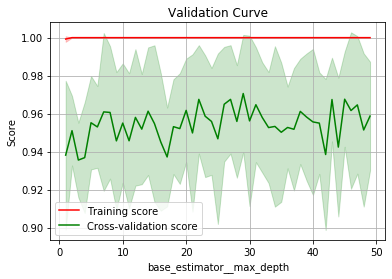

[(29, 0.9705869628837906),
 (45, 0.9675928657109708),
 (22, 0.9675101590397235),
 (27, 0.9675101590397235),
 (43, 0.9674262956318154),
 (26, 0.9649430801658747),
 (31, 0.9646981322173138),
 (47, 0.9646092882318404),
 (20, 0.9617130575904481),
 (46, 0.961629078508874),
 (14, 0.9612778932586543),
 (38, 0.9611806010279118),
 (7, 0.9609147936208287),
 (8, 0.9606349541082526),
 (49, 0.9587122340575025),
 (23, 0.9586404113884359),
 (39, 0.958186149715714),
 (12, 0.9580199337759364),
 (32, 0.957995233666589),
 (30, 0.9561756435215228),
 (28, 0.9558986718887299),
 (24, 0.9558973994784029),
 (40, 0.9556419079387357),
 (5, 0.9552077912798606),
 (10, 0.9550321986547509),
 (41, 0.9550114314500504),
 (15, 0.9547833174819681),
 (34, 0.953270724135327),
 (18, 0.953143633266548),
 (6, 0.953004054068739),
 (36, 0.9527285087185667),
 (33, 0.9526702621347047),
 (19, 0.9521268160654349),
 (13, 0.9518481037037552),
 (37, 0.9517629678855201),
 (48, 0.9513998682476943),
 (2, 0.9510389486135754),
 (35, 0.9502

In [143]:
plot_validation_curve(boosted_mod_dt, X_train, y_train, param_name = "base_estimator__max_depth", param_range = np.arange(1,50))


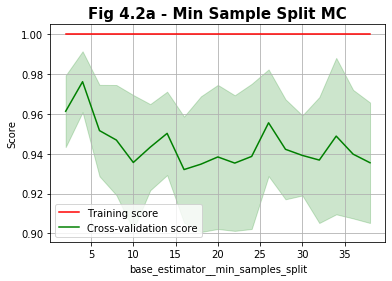

[(4, 0.9762032663929828),
 (2, 0.9613567760889975),
 (26, 0.955569976205927),
 (6, 0.9516513183918803),
 (14, 0.9502516715963262),
 (34, 0.948878817359941),
 (8, 0.9468903077598728),
 (12, 0.9433104677303206),
 (28, 0.9422523107143483),
 (36, 0.9398146777934591),
 (30, 0.939176779280608),
 (24, 0.938679804392898),
 (20, 0.9384150273712406),
 (32, 0.9368469053089429),
 (10, 0.9356307411063446),
 (38, 0.9354988826344377),
 (22, 0.9353313881033053),
 (18, 0.9347856219507904),
 (16, 0.9320788759604623)]

In [269]:
plot_validation_curve(boosted_mod_dt, X_train_scaled, y_train, param_name = "base_estimator__min_samples_split", param_range = np.arange(2, 40, 2)
                    , title = "Fig 4.2a - Min Sample Split MC")


In [337]:

mod_dt = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.01105, max_depth =18 ,random_state =1, min_samples_split = 4)
final_boosted_mod_dt = AdaBoostClassifier(mod_dt, n_estimators = 22, learning_rate = 1.1, random_state =1)
final_boosted_mod_dt.fit(X_train, y_train)

prediction=final_boosted_mod_dt.predict(X_test)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))
print(classification_report(prediction,y_test))

The balanced accuracy of the Decision Tree is 0.967
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        74
           1       0.93      0.97      0.95        40

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



# SVM

In [292]:
svc = svm.SVC(random_state = 1)
parameter_space = param_grid = {'C': [0.1, 0.01,0.001, 0.0001],
                                'gamma': [1,0.1],
                                'kernel': ['rbf']}
clf = GridSearchCV(svc, parameter_space, n_jobs=-1, cv=5, verbose = 3)
clf.fit(X_train_scaled, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found:
 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.626 (+/-0.000) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.936 (+/-0.070) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.626 (+/-0.000) for {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.626 (+/-0.000) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.626 (+/-0.000) for {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}
0.626 (+/-0.000) for {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
0.626 (+/-0.000) for {'C': 0.0001, 'gamma': 1, 'kernel': 'rbf'}
0.626 (+/-0.000) for {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}


Train Score Mean 0.9551316519637437
Test Score Mean 0.9130926999021517


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

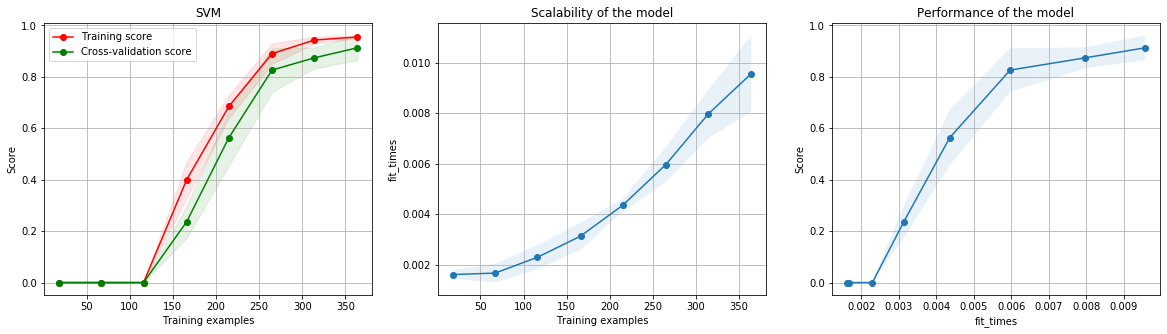

In [27]:
svc = svm.SVC(random_state = 1)
svc.set_params(**clf.best_params_)
plot_learning_curve(svc, X_train_scaled, y_train, "SVM")

## SVM RBF

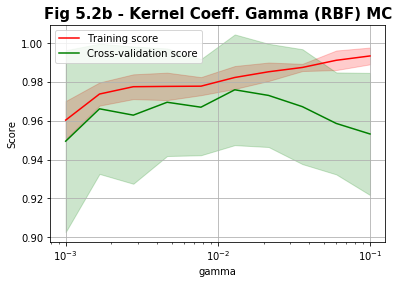

[(0.001, 0.9494677151875035),
 (0.0016681005372000592, 0.9661356054177274),
 (0.0027825594022071257, 0.9628663746484966),
 (0.004641588833612777, 0.9695009900331119),
 (0.007742636826811269, 0.9669581398993163),
 (0.01291549665014884, 0.9759160242742333),
 (0.021544346900318832, 0.9730174735495956),
 (0.03593813663804626, 0.967235196125527),
 (0.05994842503189409, 0.9586075111910723),
 (0.1, 0.9531744967361405)]

In [296]:
plot_validation_curve_log(svc, X_train_scaled, y_train, param_name = "gamma", param_range = np.logspace(-3,-1,10),
                         title = "Fig 5.2b - Kernel Coeff. Gamma (RBF) MC")

In [24]:
svc = svm.SVC(random_state = 1, gamma = 1, kernel = 'rbf', C = 1.425)
plot_learning_curve(svc, X_train_scaled, y_train, "SVM RBF")

SyntaxError: invalid syntax (<ipython-input-24-41c3891eaf3d>, line 2)

Train Score Mean 0.9797186231176627
Test Score Mean 0.9724860646599776


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

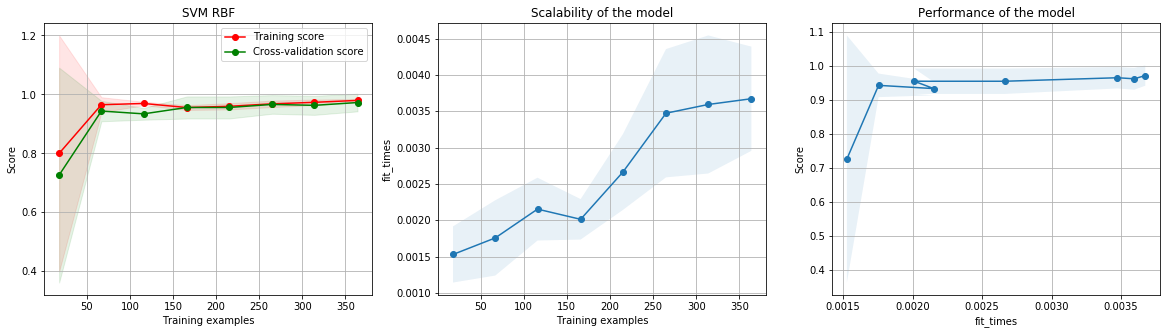

In [368]:
svc = svm.SVC(random_state = 1, gamma = 0.0129, kernel = 'rbf', C = 1.425)
plot_learning_curve(svc, X_train_scaled, y_train, "SVM RBF")

Train Score Mean 0.9822484253433597
Test Score Mean 0.9759160242742333


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

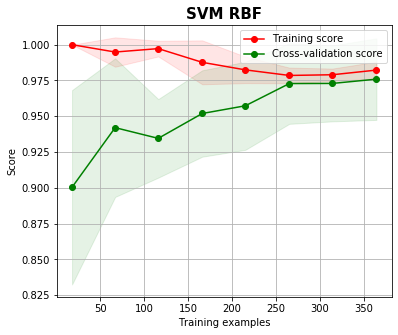

In [294]:
svc = svm.SVC(random_state = 1, gamma = 0.0129, kernel = 'rbf', C = 1.7012, class_weight = 'balanced')
plot_learning_curve(svc, X_train_scaled, y_train, "SVM RBF")

In [56]:
svc.fit(X_train_scaled, y_train)
prediction=svc.predict(X_test_scaled)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.f1_score(prediction,y_test)))
print(classification_report(prediction,y_test))


The balanced accuracy of the Decision Tree is 0.964
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        73
           1       0.95      0.98      0.96        41

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



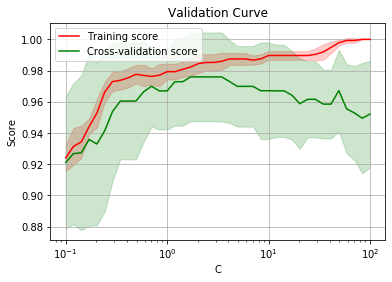

[(0.1, 0.9211133316176479),
 (0.11937766417144363, 0.9267643157676859),
 (0.14251026703029981, 0.9272643944851285),
 (0.17012542798525893, 0.9358099964551577),
 (0.20309176209047358, 0.9329114457305201),
 (0.24244620170823283, 0.941358650699464),
 (0.2894266124716751, 0.9537190963341858),
 (0.345510729459222, 0.960449865564955),
 (0.41246263829013524, 0.960449865564955),
 (0.4923882631706739, 0.960449865564955),
 (0.5878016072274913, 0.9664084902735798),
 (0.701703828670383, 0.9699419421158553),
 (0.837677640068292, 0.9669581398993163),
 (1.0, 0.9669581398993163),
 (1.1937766417144369, 0.9728404928404928),
 (1.4251026703029985, 0.9728404928404928),
 (1.7012542798525891, 0.9759160242742333),
 (2.0309176209047357, 0.9759160242742333),
 (2.424462017082328, 0.9759160242742333),
 (2.8942661247167516, 0.9759160242742333),
 (3.45510729459222, 0.9759160242742333),
 (4.1246263829013525, 0.9729309496473675),
 (4.923882631706742, 0.9698554182136272),
 (5.878016072274915, 0.9698554182136272),
 (7.

In [370]:
plot_validation_curve_log(svc, X_train_scaled, y_train, param_name = "C", param_range = np.logspace(-1,2,40))

Train Score Mean 0.9822484253433597
Test Score Mean 0.9759160242742333
The balanced accuracy of the Decision Tree is 0.964
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        73
           1       0.95      0.98      0.96        41

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



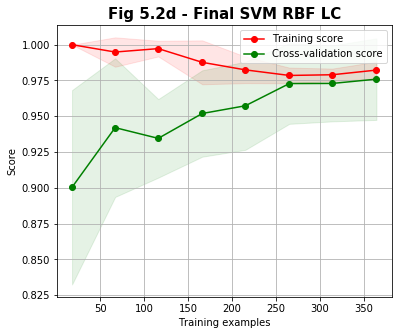

In [338]:
svc_rbf = svm.SVC(random_state = 1, gamma = 0.0129, kernel = 'rbf', C = 1.7012, class_weight = 'balanced')
plot_learning_curve(svc_rbf, X_train_scaled, y_train, "Fig 5.2d - Final SVM RBF LC")

svc_rbf.fit(X_train_scaled, y_train)
prediction=svc_rbf.predict(X_test_scaled)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.f1_score(prediction,y_test)))
print(classification_report(prediction,y_test))

## SVM Linear

In [105]:
svc = svm.SVC(random_state = 1)
parameter_space = param_grid = {'C': [0.1, 0.01,0.001, 0.0001],
                                'gamma': [1,0.1,0.5],
                                'kernel': ['linear']}
clf = GridSearchCV(svc, parameter_space, n_jobs=-1, cv=5, verbose = 3)
clf.fit(X_train_scaled, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:
 {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.848 (+/-0.016) for {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.848 (+/-0.016) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
0.848 (+/-0.016) for {'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}
0.846 (+/-0.013) for {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}
0.846 (+/-0.013) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}
0.846 (+/-0.013) for {'C': 0.01, 'gamma': 0.5, 'kernel': 'linear'}
0.827 (+/-0.027) for {'C': 0.001, 'gamma': 1, 'kernel': 'linear'}
0.827 (+/-0.027) for {'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}
0.827 (+/-0.027) for {'C': 0.001, 'gamma': 0.5, 'kernel': 'linear'}
0.651 (+/-0.001) for {'C': 0.0001, 'gamma': 1, 'kernel': 'linear'}
0.651 (+/-0.001) for {'C': 0.0001, 'gamma': 0.1, 'kernel': 'linear'}
0.651 (+/-0.001) for {'C': 0.0001, 'gamma': 0.5, 'kernel': 'linear'}


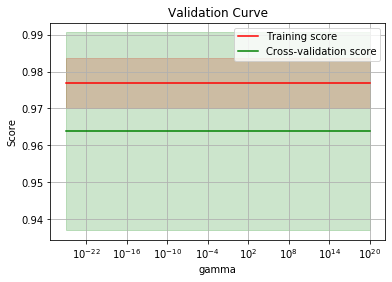

[(1e-25, 0.9637904124860647),
 (1e-20, 0.9637904124860647),
 (1e-15, 0.9637904124860647),
 (1e-10, 0.9637904124860647),
 (1e-05, 0.9637904124860647),
 (1.0, 0.9637904124860647),
 (100000.0, 0.9637904124860647),
 (10000000000.0, 0.9637904124860647),
 (1000000000000000.0, 0.9637904124860647),
 (1e+20, 0.9637904124860647)]

In [223]:
plot_validation_curve_log(svc, X_train_scaled, y_train, param_name = "gamma", param_range = np.logspace(-25,20,10))

Train Score Mean 0.976901012544334
Test Score Mean 0.9637904124860647


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

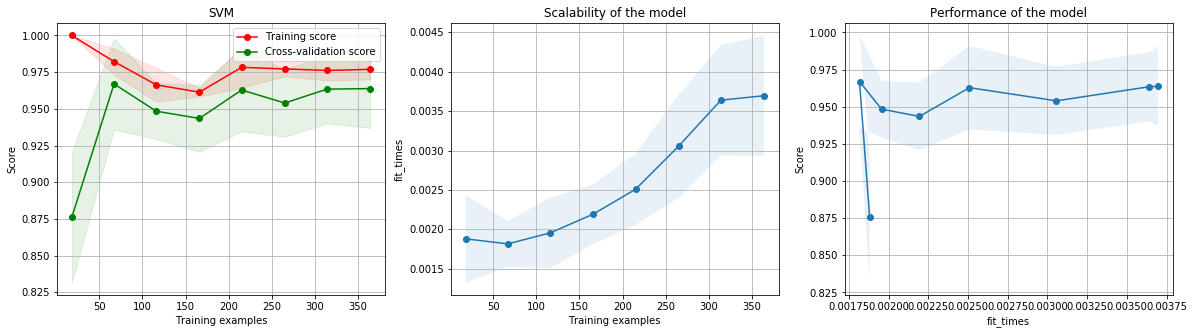

In [225]:
svc = svm.SVC(random_state = 1, gamma = 1, kernel = 'linear', C = 0.01832, class_weight = "balanced")
plot_learning_curve(svc, X_train_scaled, y_train, "SVM")

Train Score Mean 0.9843362283147613
Test Score Mean 0.9728494063227047


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

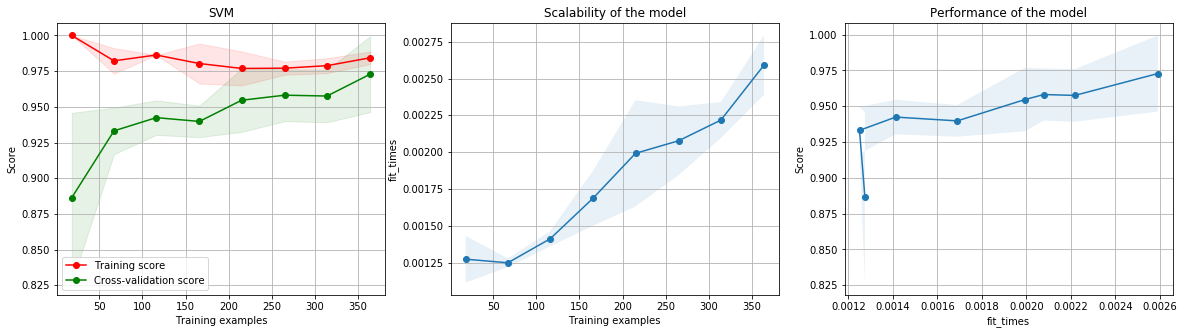

In [233]:
svc = svm.SVC(random_state = 1, gamma = 1, kernel = 'linear', C = 0.2335)
plot_learning_curve(svc, X_train_scaled, y_train, "SVM")

Train Score Mean 0.9829268186861203
Test Score Mean 0.9700336713330568


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

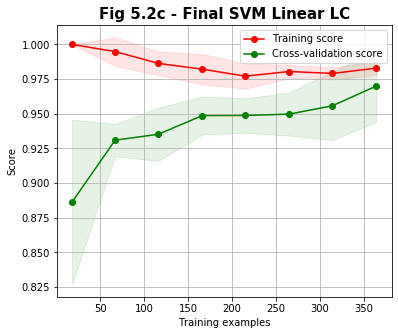

In [297]:
svc = svm.SVC(random_state = 1, gamma = 1, kernel = 'linear', C = 0.1623, class_weight = 'balanced')
plot_learning_curve(svc, X_train_scaled, y_train, "Fig 5.2c - Final SVM Linear LC")

Train Score Mean 0.9828326545884947
Test Score Mean 0.9728494063227047


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

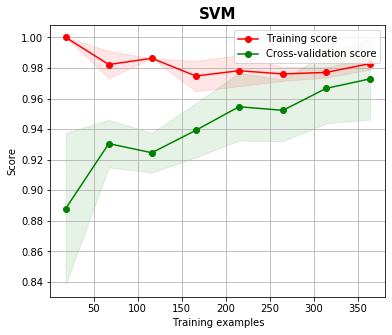

In [287]:
svc = svm.SVC(random_state = 1, gamma = 1, kernel = 'linear', C = 0.1623)
plot_learning_curve(svc, X_train_scaled, y_train, "SVM")

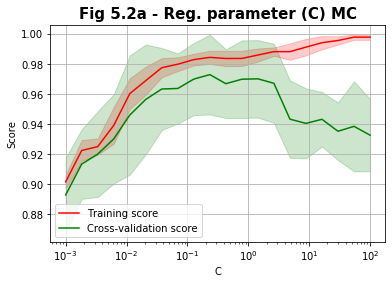

[(0.001, 0.892686609909136),
 (0.0018329807108324356, 0.913235717804729),
 (0.003359818286283781, 0.9198779644469756),
 (0.006158482110660267, 0.9300020339258838),
 (0.011288378916846888, 0.9458847891634777),
 (0.02069138081114789, 0.9563313034395124),
 (0.0379269019073225, 0.9632466846370156),
 (0.06951927961775606, 0.9636186370919356),
 (0.12742749857031335, 0.9698643316958391),
 (0.23357214690901212, 0.9728494063227047),
 (0.42813323987193913, 0.9667888002620988),
 (0.7847599703514607, 0.9697738748889645),
 (1.438449888287663, 0.9700336713330568),
 (2.636650898730358, 0.9670523048734294),
 (4.832930238571752, 0.9431744911448694),
 (8.858667904100823, 0.9403611919121329),
 (16.23776739188721, 0.9430748961183744),
 (29.763514416313193, 0.9351038816256209),
 (54.555947811685144, 0.9383895675497819),
 (100.0, 0.9325153224428003)]

In [290]:
plot_validation_curve_log(svc, X_train_scaled, y_train, param_name = "C", param_range = np.logspace(-3,2,20),
                         title = "Fig 5.2a - Reg. parameter (C) MC")

Train Score Mean 0.9829268186861203
Test Score Mean 0.9700336713330568
The balanced accuracy of the Decision Tree is 0.964
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        73
           1       0.95      0.98      0.96        41

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



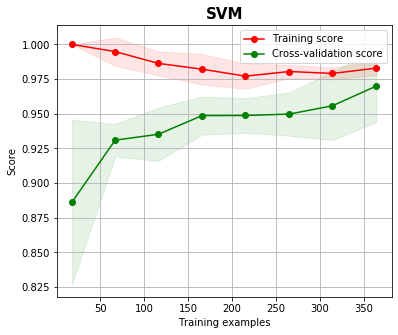

In [339]:
svc_linear = svm.SVC(random_state = 1, gamma = 1, kernel = 'linear', C = 0.1623, class_weight = 'balanced')
plot_learning_curve(svc_linear, X_train_scaled, y_train, "SVM")

svc_linear.fit(X_train_scaled, y_train)
prediction=svc_linear.predict(X_test_scaled)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.f1_score(prediction,y_test)))
print(classification_report(prediction,y_test))

# SVM Poly

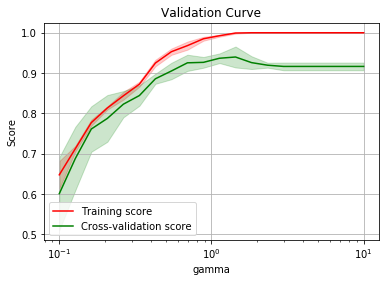

[(0.1, 0.6005358550039401),
 (0.12742749857031338, 0.6877241749582176),
 (0.16237767391887217, 0.7610403957834017),
 (0.20691380811147897, 0.7873147191791261),
 (0.26366508987303583, 0.8226278144220869),
 (0.33598182862837817, 0.844102406613923),
 (0.42813323987193935, 0.88573087431694),
 (0.5455594781168519, 0.9050738045424952),
 (0.6951927961775606, 0.9253423450768598),
 (0.8858667904100825, 0.9265030864001659),
 (1.1288378916846888, 0.936671926766844),
 (1.438449888287663, 0.9397668140073758),
 (1.8329807108324356, 0.9258305217747139),
 (2.3357214690901213, 0.9194277530098427),
 (2.9763514416313175, 0.9163761098173543),
 (3.79269019073225, 0.9163761098173543),
 (4.832930238571752, 0.9163761098173543),
 (6.158482110660261, 0.9163761098173543),
 (7.847599703514611, 0.9163761098173543),
 (10.0, 0.9163761098173543)]

In [267]:
plot_validation_curve_log(svc, X_train_scaled, y_train, param_name = "gamma", param_range = np.logspace(-1,1,20))

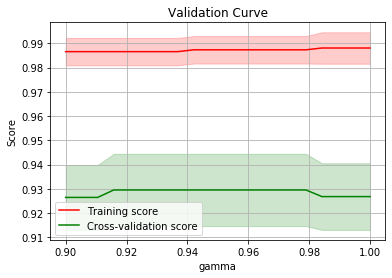

[(0.9157894736842106, 0.9295672685947828),
 (0.9210526315789473, 0.9295672685947828),
 (0.9263157894736842, 0.9295672685947828),
 (0.9315789473684211, 0.9295672685947828),
 (0.9368421052631579, 0.9295672685947828),
 (0.9421052631578948, 0.9295672685947828),
 (0.9473684210526316, 0.9295672685947828),
 (0.9526315789473684, 0.9295672685947828),
 (0.9578947368421052, 0.9295672685947828),
 (0.9631578947368421, 0.9295672685947828),
 (0.968421052631579, 0.9295672685947828),
 (0.9736842105263158, 0.9295672685947828),
 (0.9789473684210527, 0.9295672685947828),
 (0.9842105263157894, 0.9268392208539474),
 (0.9894736842105263, 0.9268392208539474),
 (0.9947368421052631, 0.9268392208539474),
 (1.0, 0.9268392208539474),
 (0.9, 0.9265030864001659),
 (0.9052631578947369, 0.9265030864001659),
 (0.9105263157894737, 0.9265030864001659)]

In [278]:
plot_validation_curve(svc, X_train_scaled, y_train, param_name = "gamma", param_range = np.linspace(0.9,1,20))

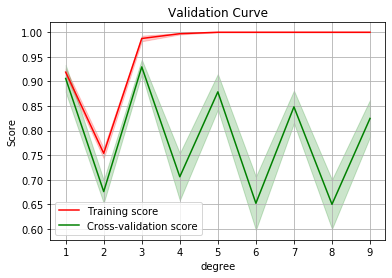

[(3, 0.9295672685947828),
 (1, 0.9060380479735318),
 (5, 0.8788347825183015),
 (7, 0.8483366257650674),
 (9, 0.8248125280912166),
 (4, 0.7061791831357049),
 (2, 0.676050616050616),
 (6, 0.6522800763596697),
 (8, 0.6501665180832724)]

In [332]:
plot_validation_curve(svc, X_train_scaled, y_train, param_name = "degree", param_range = np.arange(1,10))

Train Score Mean 0.9880536750447148
Test Score Mean 0.9268392208539474


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

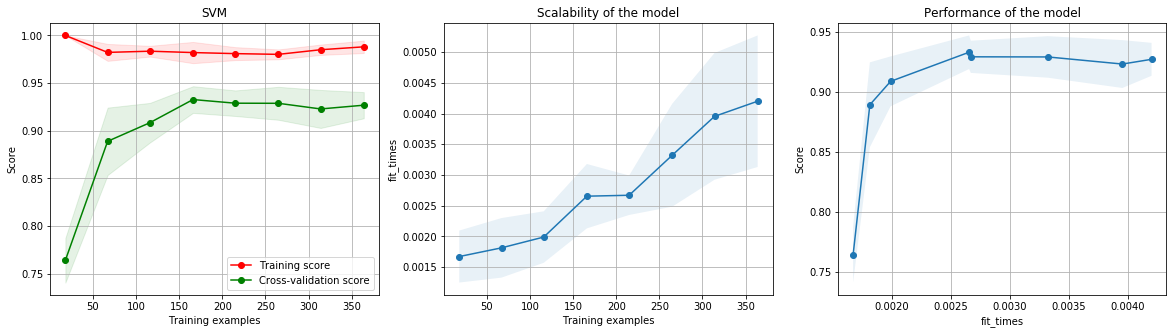

In [344]:
svc = svm.SVC(random_state = 1, gamma = 1, kernel = 'poly', C = 0.00175, degree = 3)
plot_learning_curve(svc, X_train_scaled, y_train, "SVM")

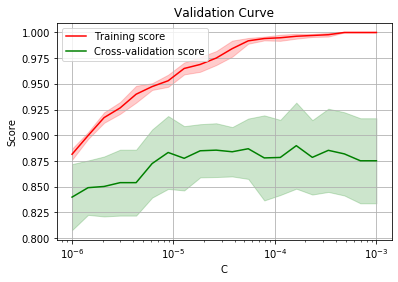

[(1e-06, 0.8398417549848503),
 (1.438449888287663e-06, 0.8490194833407319),
 (2.06913808111479e-06, 0.8501987208458305),
 (2.976351441631319e-06, 0.853914567840366),
 (4.281332398719396e-06, 0.853914567840366),
 (6.158482110660267e-06, 0.8724925861620323),
 (8.858667904100832e-06, 0.8832519656714117),
 (1.274274985703132e-05, 0.8775921727175234),
 (1.8329807108324375e-05, 0.8849133586163065),
 (2.6366508987303556e-05, 0.8855190259319023),
 (3.792690190732254e-05, 0.8839520160021829),
 (5.4555947811685143e-05, 0.8869013247579434),
 (7.847599703514606e-05, 0.8779727533293717),
 (0.00011288378916846884, 0.8784180533902903),
 (0.0001623776739188721, 0.8898776497368047),
 (0.00023357214690901214, 0.8785092395167021),
 (0.0003359818286283781, 0.8853437938512565),
 (0.0004832930238571752, 0.881882255389718),
 (0.0006951927961775605, 0.8751809363644554),
 (0.001, 0.8751809363644554)]

In [340]:
plot_validation_curve_log(svc, X_train_scaled, y_train, param_name = "C", param_range = np.logspace(-6,-3,20))

# KNN

In [318]:
knn = KNeighborsClassifier()
parameter_space = {'n_neighbors':[1,5,10,25,50,],
              'leaf_size':[1,3,5, 10],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
                   'weights' :['uniform' , 'distance'],
                   'p' : [1,2]
              }
clf = GridSearchCV(knn, parameter_space, n_jobs=-1, cv=5, verbose = 3)
clf.fit(X_train_scaled, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters found:
 {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.967 (+/-0.037) for {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.967 (+/-0.037) for {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.969 (+/-0.051) for {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.969 (+/-0.051) for {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.960 (+/-0.053) for {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.960 (+/-0.053) for {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.960 (+/-0.074) for {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.960 (+/-0.074) for {'algorithm':

Train Score Mean 1.0
Test Score Mean 0.9579336518986097


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

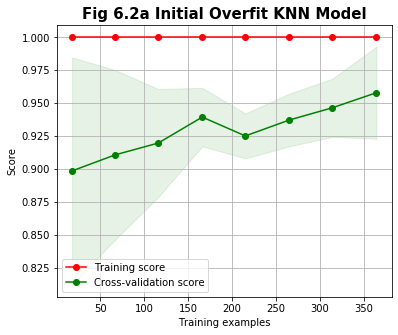

In [319]:
knn = KNeighborsClassifier()
knn.set_params(**clf.best_params_)
plot_learning_curve(knn, X_train_scaled, y_train, "Fig 6.2a Initial Overfit KNN Model")

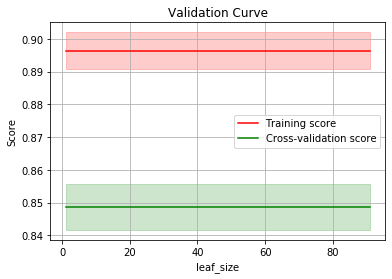

In [119]:
plot_validation_curve(knn, X_train_scaled, y_train, param_name = "leaf_size", param_range = np.arange(1,100,10))


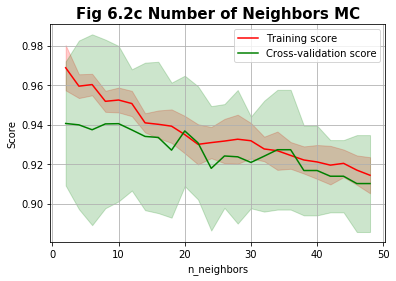

[(2, 0.9405527805527806),
 (10, 0.9404595404595405),
 (8, 0.94033878374875),
 (4, 0.9398589940525424),
 (6, 0.9373737373737374),
 (12, 0.9372835497835498),
 (20, 0.9367681780585005),
 (14, 0.9339926429960131),
 (16, 0.9334749767536653),
 (22, 0.9307306313757927),
 (34, 0.9272585479037092),
 (36, 0.9272585479037092),
 (18, 0.9270355828142713),
 (26, 0.924088384733546),
 (32, 0.9239893171344784),
 (28, 0.9236625669412554),
 (30, 0.9208191539643152),
 (24, 0.9178184110970996),
 (38, 0.9167175406413903),
 (40, 0.9167175406413903),
 (42, 0.9138270977509476),
 (44, 0.9138270977509476),
 (46, 0.9101112507564121),
 (48, 0.9101112507564121)]

In [321]:
plot_validation_curve(knn, X_train_scaled, y_train, param_name = "n_neighbors", param_range = np.arange(2,50,2)
                     , title = "Fig 6.2c Number of Neighbors MC")


Train Score Mean 1.0
Test Score Mean 0.9568994852576942


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

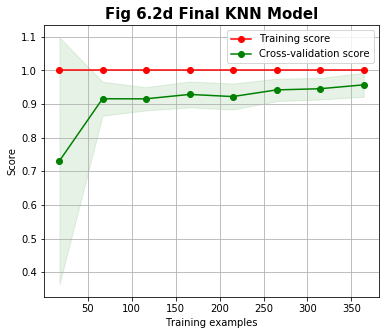

In [324]:
knn = KNeighborsClassifier(algorithm = 'auto', p=2, n_neighbors = 4, weights = 'distance')
plot_learning_curve(knn, X_train_scaled, y_train, "Fig 6.2d Final KNN Model")

Train Score Mean 0.9310343181062259
Test Score Mean 0.9337744926394421


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

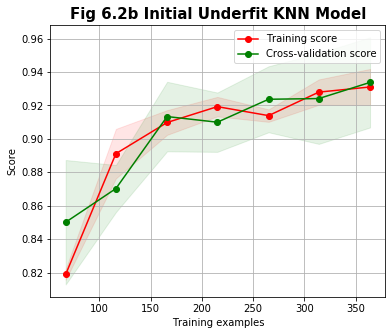

In [322]:
knn = KNeighborsClassifier(algorithm = 'auto', p=1, leaf_size= 1, n_neighbors = 21)
plot_learning_curve(knn, X_train_scaled, y_train, "Fig 6.2b Initial Underfit KNN Model")

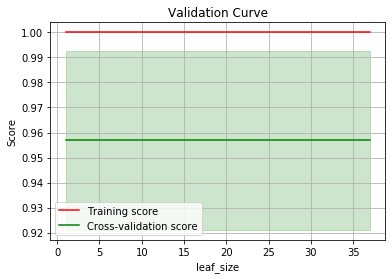

[(1, 0.9568994852576942),
 (3, 0.9568994852576942),
 (5, 0.9568994852576942),
 (7, 0.9568994852576942),
 (9, 0.9568994852576942),
 (11, 0.9568994852576942),
 (13, 0.9568994852576942),
 (15, 0.9568994852576942),
 (17, 0.9568994852576942),
 (19, 0.9568994852576942),
 (21, 0.9568994852576942),
 (23, 0.9568994852576942),
 (25, 0.9568994852576942),
 (27, 0.9568994852576942),
 (29, 0.9568994852576942),
 (31, 0.9568994852576942),
 (33, 0.9568994852576942),
 (35, 0.9568994852576942),
 (37, 0.9568994852576942)]

In [411]:
plot_validation_curve(knn, X_train_scaled, y_train, param_name = "leaf_size", param_range = np.arange(1,39,2))


The balanced accuracy of the Decision Tree is 0.940
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        73
           1       0.93      0.95      0.94        41

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Train Score Mean 1.0
Test Score Mean 0.9568994852576942


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

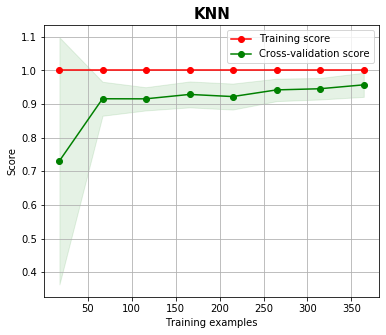

In [340]:
knn_final = KNeighborsClassifier(algorithm = 'auto', p=2, n_neighbors = 4, weights = 'distance')
knn_final.fit(X_train_scaled, y_train)
prediction=knn_final.predict(X_test_scaled)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.f1_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(knn_final, X_train_scaled, y_train, "KNN")

# Neural Network

In [64]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

In [511]:
mlp = MLPClassifier(max_iter=250)
parameter_space = {
    'hidden_layer_sizes': [(5), (25), (50), (5,5), (25,25), (16,25)],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'solver': ['adam'],
    'learning_rate': ['constant','adaptive'],
    'random_state' : [1]
}
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5, scoring = 'f1')
clf.fit(X_train_scaled, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.95234488 0.95234488 0.96695687 0.96695687 0.95803933 0.95803933
 0.9498323  0.9498323  0.95534411 0.95534411 0.96379481 0.96379481
 0.95498688 0.95498688 0.96958169 0.96958169 0.96387631 0.96387631
 0.96968608 0.96968608 0.95809442 0.95809442 0.96106301 0.96106301
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
  category=UserWarning


Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (5, 5), 'learning_rate': 'constant', 'random_state': 1, 'solver': 'adam'}
0.952 (+/-0.054) for {'activation': 'relu', 'hidden_layer_sizes': 5, 'learning_rate': 'constant', 'random_state': 1, 'solver': 'adam'}
0.952 (+/-0.054) for {'activation': 'relu', 'hidden_layer_sizes': 5, 'learning_rate': 'adaptive', 'random_state': 1, 'solver': 'adam'}
0.967 (+/-0.046) for {'activation': 'relu', 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'random_state': 1, 'solver': 'adam'}
0.967 (+/-0.046) for {'activation': 'relu', 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'random_state': 1, 'solver': 'adam'}
0.958 (+/-0.055) for {'activation': 'relu', 'hidden_layer_sizes': 50, 'learning_rate': 'constant', 'random_state': 1, 'solver': 'adam'}
0.958 (+/-0.055) for {'activation': 'relu', 'hidden_layer_sizes': 50, 'learning_rate': 'adaptive', 'random_state': 1, 'solver': 'adam'}
0.950 (+/-0.062) for {'activation': 'relu',

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [525]:
clf.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (5, 5),
 'learning_rate': 'constant',
 'random_state': 1,
 'solver': 'adam'}

Train Score Mean 0.980618981123879
Test Score Mean 0.9666794275376365


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

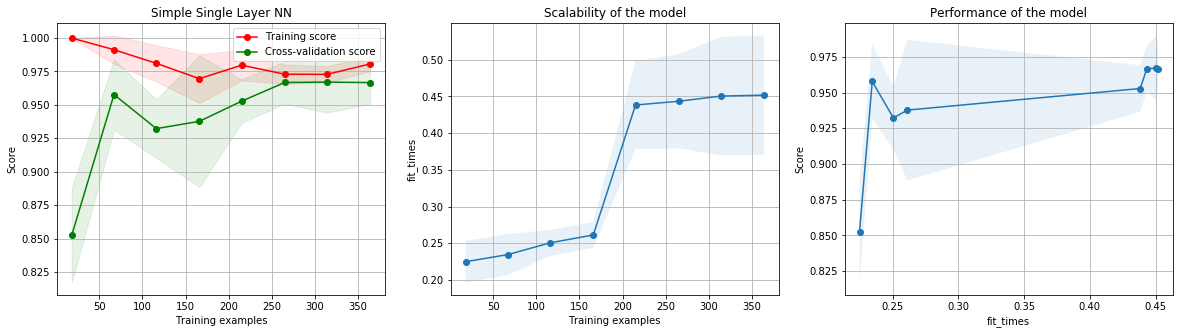

In [504]:
mod_nn = MLPClassifier( max_iter=310)
mod_nn.set_params(**clf.best_params_)
plot_learning_curve(mod_nn, X_train_scaled, y_train, "Simple Single Layer NN")

Train Score Mean 0.9783493071554081
Test Score Mean 0.9602532524765509


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

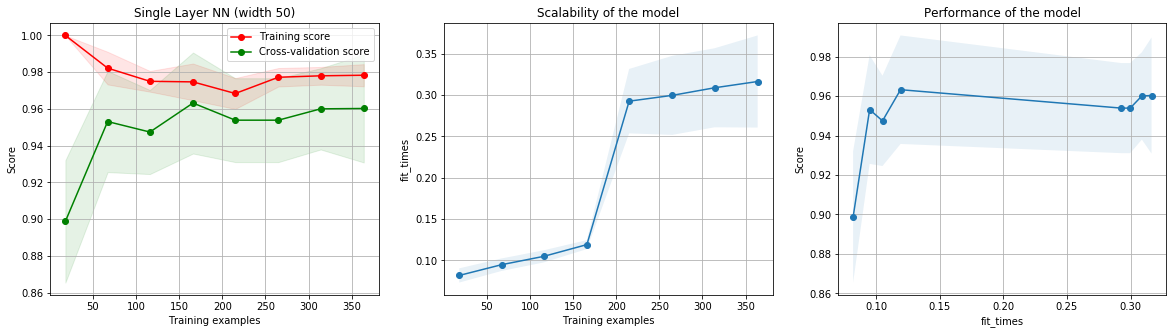

In [95]:
mod_nn = MLPClassifier( alpha = 1, activation = 'tanh', hidden_layer_sizes = 50, max_iter=100, random_state =1)

plot_learning_curve(mod_nn, X_train_scaled, y_train, "Single Layer NN (width 50)")

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (170) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (190) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (210) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


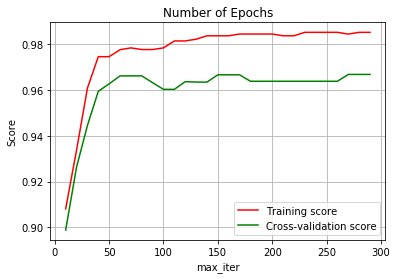

[(270, 0.9667659514398645),
 (280, 0.9667659514398645),
 (290, 0.9667659514398645),
 (150, 0.9665978842129738),
 (160, 0.9665978842129738),
 (170, 0.9665978842129738),
 (60, 0.9661356054177274),
 (70, 0.9661356054177274),
 (80, 0.9661356054177274),
 (180, 0.9637845849802371),
 (190, 0.9637845849802371),
 (200, 0.9637845849802371),
 (210, 0.9637845849802371),
 (220, 0.9637845849802371),
 (230, 0.9637845849802371),
 (240, 0.9637845849802371),
 (250, 0.9637845849802371),
 (260, 0.9637845849802371),
 (120, 0.9636186370919356),
 (130, 0.9634277210428106),
 (140, 0.9634277210428106),
 (90, 0.9631505307908617),
 (50, 0.9626646556058323),
 (100, 0.9602532524765509),
 (110, 0.9602532524765509),
 (40, 0.9593954248366015),
 (30, 0.9444637275199934),
 (20, 0.9263076585398797),
 (10, 0.8988924839671109)]

In [96]:
plot_validation_curve_nn(mod_nn, X_train, y_train, param_name = "max_iter", param_range = np.arange(10, 300, 10), title = "Number of Epochs")

Train Score Mean 0.9752908490045391
Test Score Mean 0.9627582841486151


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

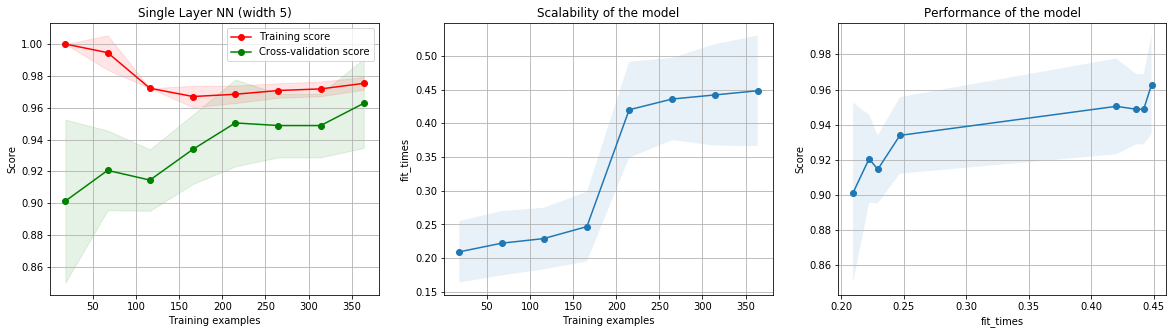

In [97]:
mod_nn = MLPClassifier( alpha = 1, activation = 'tanh', hidden_layer_sizes = 5, max_iter=310, random_state =1)

plot_learning_curve(mod_nn, X_train_scaled, y_train, "Single Layer NN (width 5)")

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (170) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


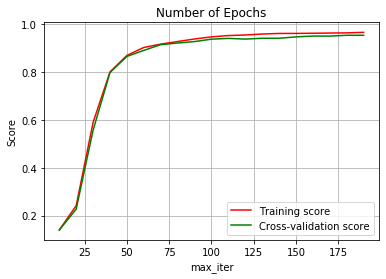

[(180, 0.9547360017735442),
 (190, 0.9547360017735442),
 (160, 0.9513629859005285),
 (170, 0.9513629859005285),
 (150, 0.9480937551312977),
 (130, 0.9421948476360242),
 (140, 0.9421948476360242),
 (110, 0.941719110077319),
 (120, 0.9388218317630083),
 (100, 0.9384557068139158),
 (90, 0.9285443171672526),
 (80, 0.9222986225633492),
 (70, 0.9155483364005544),
 (60, 0.8915233707817588),
 (50, 0.8662695156337655),
 (40, 0.79902575185072),
 (30, 0.558019749835418),
 (20, 0.22742272059572116),
 (10, 0.13997732426303855)]

In [98]:
plot_validation_curve_nn(mod_nn, X_train, y_train, param_name = "max_iter", param_range = np.arange(10, 200, 10), title = "Number of Epochs")

Train Score Mean 0.9822055786378987
Test Score Mean 0.9698643316958391


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

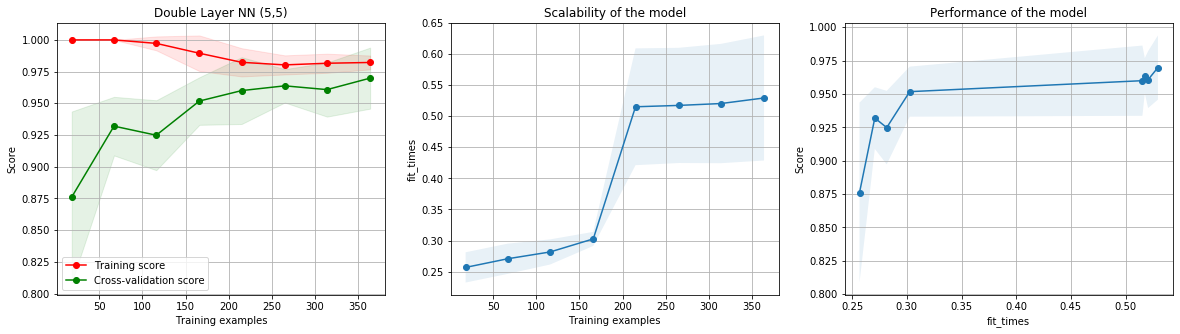

In [100]:
mod_nn = MLPClassifier( alpha = 1, activation = 'tanh', hidden_layer_sizes = (5,5), max_iter=310, random_state =1)
plot_learning_curve(mod_nn, X_train_scaled, y_train, "Double Layer NN (5,5)")

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (170) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (190) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


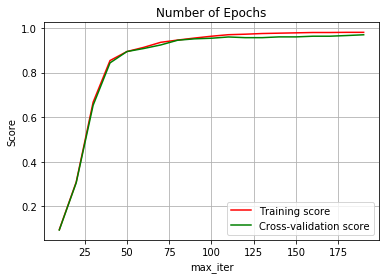

[(190, 0.9696860785764094),
 (180, 0.9663206939610248),
 (160, 0.9632451625272844),
 (170, 0.9632451625272844),
 (140, 0.9602613603107457),
 (150, 0.9602613603107457),
 (110, 0.9598646695222639),
 (120, 0.9567891380885236),
 (130, 0.9567891380885236),
 (100, 0.9541896134301753),
 (90, 0.9514973057378677),
 (80, 0.9452542716282839),
 (70, 0.9240819350389149),
 (60, 0.908204214086567),
 (50, 0.8944480732739745),
 (40, 0.8436616732617297),
 (30, 0.6533779112001892),
 (20, 0.3059383705725169),
 (10, 0.094012474012474)]

In [101]:
plot_validation_curve_nn(mod_nn, X_train, y_train, param_name = "max_iter", param_range = np.arange(10, 200, 10), title = "Number of Epochs")

Train Score Mean 0.9821613747292108
Test Score Mean 0.9699356478477179


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

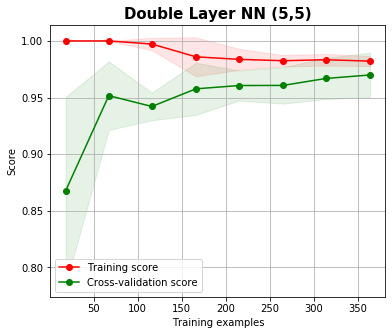

In [333]:
classifier = MLPClassifier( alpha = 0.886, activation = 'tanh', hidden_layer_sizes = (5,5), max_iter=275, random_state =1, solver = 'sgd'
                          , momentum = 0.978947)
plot_learning_curve(classifier, X_train_scaled, y_train, "Double Layer NN (5,5)")

Train Score Mean 0.9836922436489655
Test Score Mean 0.9633344809495703


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

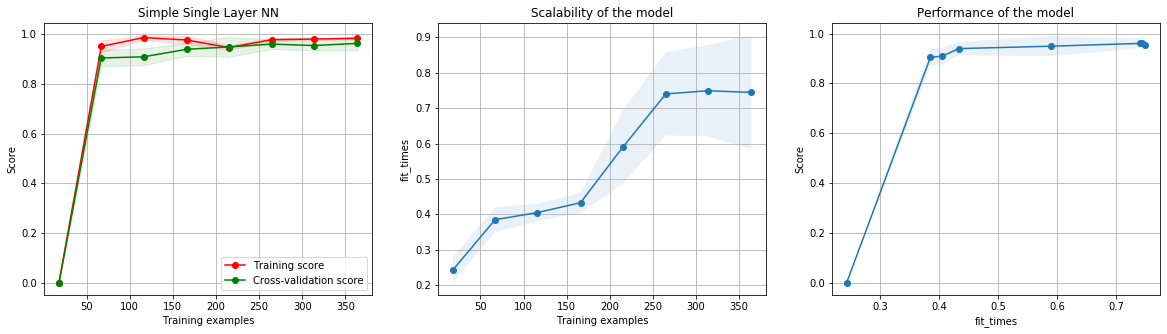

In [650]:
classifier = MLPClassifier( alpha = 4, activation = 'relu', hidden_layer_sizes = (5,5), max_iter=410, random_state =1, solver = 'sgd'
                          , momentum = 0.978947)
plot_learning_curve(classifier, X_train_scaled, y_train, "Simple Single Layer NN")

Train Score Mean 0.9836593999896284
Test Score Mean 0.9699356478477179


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

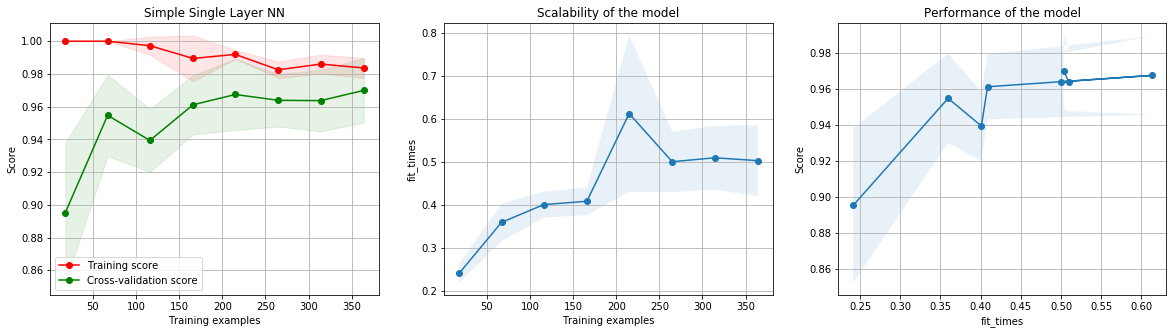

In [599]:
classifier = MLPClassifier( alpha = 0.01, activation = 'tanh', hidden_layer_sizes = (5,5), max_iter=1500, random_state =1, solver = 'sgd'
                          , momentum = 0.978947)
plot_learning_curve(classifier, X_train_scaled, y_train, "Simple Single Layer NN")

Train Score Mean 1.0
Test Score Mean 0.9639730652724505


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

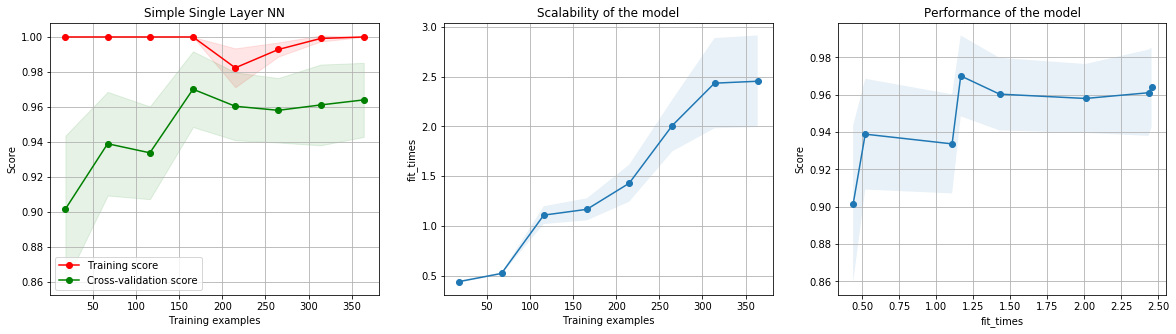

In [552]:
mod_nn = MLPClassifier( alpha = 0.8, activation = 'relu', hidden_layer_sizes = (50,50), max_iter=400, random_state =1)
plot_learning_curve(mod_nn, X_train_scaled, y_train, "Simple Single Layer NN")

In [328]:
classifier = MLPClassifier( max_iter=250)
classifier.set_params(**clf.best_params_)
plot_learning_curve(classifier, X_train_scaled, y_train, "Simple Single Layer NN")

ValueError: Invalid parameter algorithm for estimator MLPClassifier(max_iter=250). Check the list of available parameters with `estimator.get_params().keys()`.

Train Score Mean 0.9850964720399554
Test Score Mean 0.9662086705564967


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

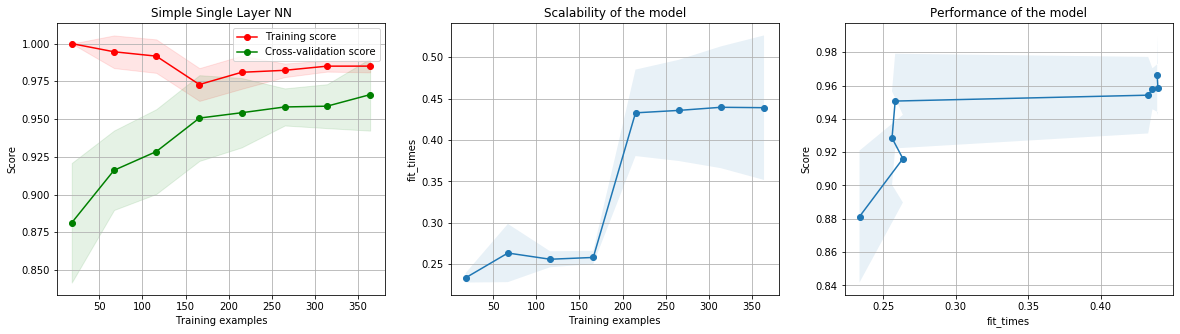

In [445]:
classifier = MLPClassifier(alpha = 0.001, hidden_layer_sizes=(6), max_iter=310,activation = 'relu',solver='adam',random_state=1)
plot_learning_curve(classifier, X_train_scaled, y_train, "Simple Single Layer NN")

Train Score Mean 0.9865892966203701
Test Score Mean 0.9635957882697014


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

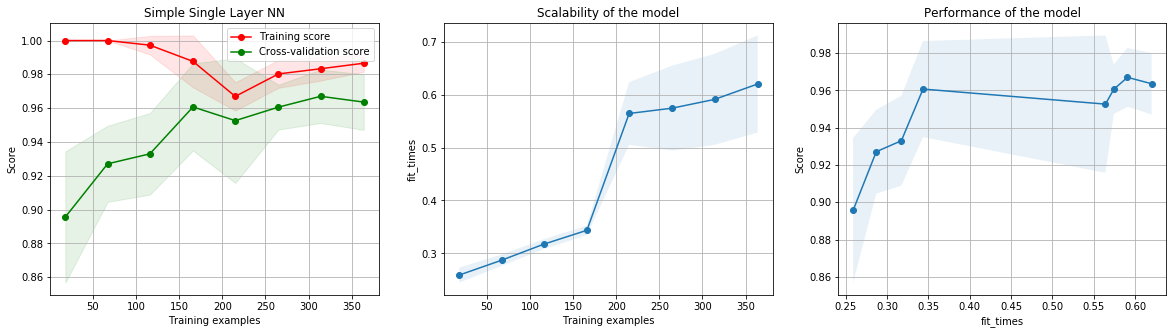

In [487]:
classifier = MLPClassifier( alpha =1.832, hidden_layer_sizes=(16, 25), max_iter=260,activation = 'logistic',solver='adam',random_state=1)
plot_learning_curve(classifier, X_train_scaled, y_train, "Simple Single Layer NN")

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/u

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (210) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (260) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


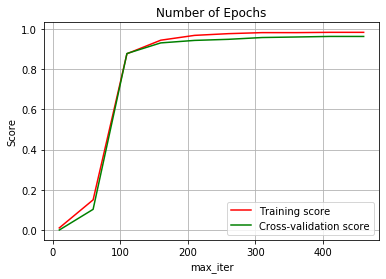

[(410, 0.9633344809495703),
 (460, 0.9632340217073201),
 (360, 0.9605187459599225),
 (310, 0.9578896103896104),
 (260, 0.9489304536043667),
 (210, 0.9435336282075412),
 (160, 0.9311056742717501),
 (110, 0.8782806051218571),
 (60, 0.10290717412668633),
 (10, 0.0)]

In [649]:
plot_validation_curve_nn(classifier, X_train, y_train, param_name = "max_iter", param_range = np.arange(10, 500, 50), title = "Number of Epochs")

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


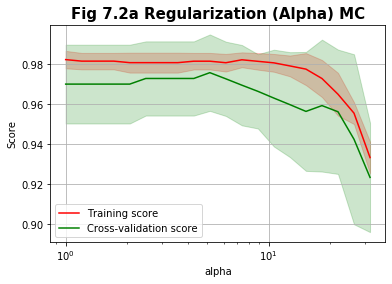

[(1.0, 0.9699356478477179),
 (1.1993539462092342, 0.9699356478477179),
 (1.4384498882876628, 0.9699356478477179),
 (1.7252105499420405, 0.9699356478477179),
 (2.0691380811147897, 0.9699356478477179),
 (2.481628922836826, 0.9727489470804545),
 (2.976351441631318, 0.9727489470804545),
 (3.5696988468260646, 0.9727489470804545),
 (4.281332398719393, 0.9727489470804545),
 (5.134832907437552, 0.9756462253947653),
 (6.158482110660264, 0.9725706939610248),
 (7.3861998220793605, 0.9694005307908616),
 (8.858667904100825, 0.9663249993571214),
 (10.624678308940409, 0.9629519834841055),
 (12.742749857031335, 0.9596827527148747),
 (15.283067326587688, 0.9563097368418589),
 (18.329807108324356, 0.9592082875664965),
 (21.983926488622892, 0.9561327561327561),
 (26.366508987303583, 0.9424029663268161),
 (31.622776601683793, 0.923359787283637)]

In [326]:
plot_validation_curve_log(classifier, X_train_scaled, y_train, param_name = "alpha", param_range = np.logspace(-0,1.5,20), title = "Fig 7.2a Regularization (Alpha) MC")


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


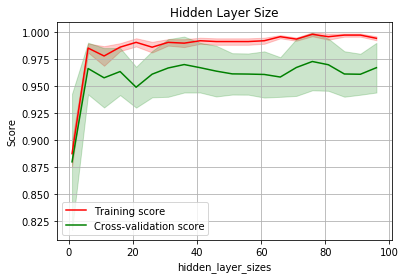

[(76, 0.9726711532032752),
 (36, 0.9698554182136272),
 (81, 0.9696860785764094),
 (71, 0.9671189997025607),
 (41, 0.9669568674889895),
 (96, 0.9669568674889895),
 (31, 0.966685255043464),
 (6, 0.9662086705564967),
 (46, 0.9637867043188264),
 (16, 0.9634020889342109),
 (51, 0.9612438541850306),
 (86, 0.9611449175441826),
 (56, 0.9610656010656011),
 (26, 0.9609709693291784),
 (91, 0.9608975338387105),
 (61, 0.960711172885086),
 (66, 0.9583291825545347),
 (11, 0.9576213336198736),
 (21, 0.9489119214119214),
 (1, 0.8800346933367843)]

In [439]:
 plot_validation_curve(classifier, X_train_scaled, y_train, param_name = "hidden_layer_sizes", param_range = np.arange(1,100,5), title = "Hidden Layer Size")


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


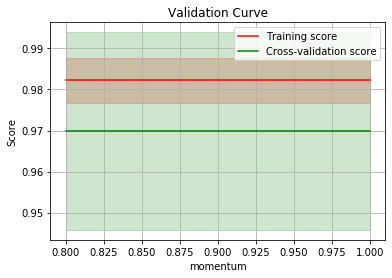

[(0.8, 0.9698643316958391),
 (0.8105263157894738, 0.9698643316958391),
 (0.8210526315789474, 0.9698643316958391),
 (0.8315789473684211, 0.9698643316958391),
 (0.8421052631578948, 0.9698643316958391),
 (0.8526315789473684, 0.9698643316958391),
 (0.8631578947368421, 0.9698643316958391),
 (0.8736842105263158, 0.9698643316958391),
 (0.8842105263157896, 0.9698643316958391),
 (0.8947368421052632, 0.9698643316958391),
 (0.9052631578947369, 0.9698643316958391),
 (0.9157894736842105, 0.9698643316958391),
 (0.9263157894736842, 0.9698643316958391),
 (0.9368421052631579, 0.9698643316958391),
 (0.9473684210526316, 0.9698643316958391),
 (0.9578947368421052, 0.9698643316958391),
 (0.968421052631579, 0.9698643316958391),
 (0.9789473684210527, 0.9698643316958391),
 (0.9894736842105263, 0.9698643316958391),
 (1.0, 0.9698643316958391)]

In [104]:

plot_validation_curve(mod_nn, X_train_scaled, y_train, param_name = "momentum", param_range = np.linspace(0.8,1,20))



/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


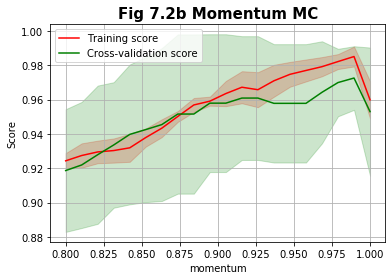

[(0.9894736842105263, 0.9725706939610248),
 (0.9789473684210527, 0.9699356478477179),
 (0.968421052631579, 0.9642538296658998),
 (0.9157894736842105, 0.9608971863092564),
 (0.9263157894736842, 0.9608971863092564),
 (0.8947368421052632, 0.9579309914042898),
 (0.9052631578947369, 0.9579309914042898),
 (0.9368421052631579, 0.957821654875516),
 (0.9473684210526316, 0.957821654875516),
 (0.9578947368421052, 0.957821654875516),
 (1.0, 0.9529880165496604),
 (0.8736842105263158, 0.9515864901344155),
 (0.8842105263157896, 0.9515864901344155),
 (0.8631578947368421, 0.9454366996772616),
 (0.8526315789473684, 0.9425394213629508),
 (0.8421052631578948, 0.9397261221302143),
 (0.8315789473684211, 0.9335803802513732),
 (0.8210526315789474, 0.9279006039322105),
 (0.8105263157894738, 0.9219251336898395),
 (0.8, 0.9186617304264363)]

In [330]:
plot_validation_curve(classifier, X_train_scaled, y_train, param_name = "momentum", param_range = np.linspace(0.8,1,20),
                     title = "Fig 7.2b Momentum MC")


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


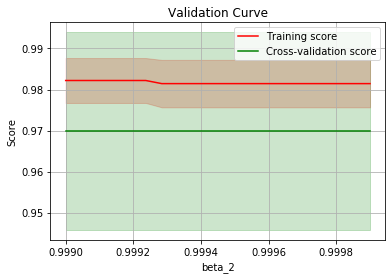

[(0.999, 0.9698643316958391),
 (0.9990473684210527, 0.9698643316958391),
 (0.9990947368421053, 0.9698643316958391),
 (0.9991421052631579, 0.9698643316958391),
 (0.9991894736842105, 0.9698643316958391),
 (0.9992368421052632, 0.9698643316958391),
 (0.9992842105263158, 0.9698643316958391),
 (0.9993315789473685, 0.9698643316958391),
 (0.999378947368421, 0.9698643316958391),
 (0.9994263157894737, 0.9698643316958391),
 (0.9994736842105263, 0.9698643316958391),
 (0.999521052631579, 0.9698643316958391),
 (0.9995684210526316, 0.9698643316958391),
 (0.9996157894736842, 0.9698643316958391),
 (0.9996631578947368, 0.9698643316958391),
 (0.9997105263157895, 0.9698643316958391),
 (0.9997578947368421, 0.9698643316958391),
 (0.9998052631578948, 0.9698643316958391),
 (0.9998526315789473, 0.9698643316958391),
 (0.9999, 0.9698643316958391)]

In [575]:
plot_validation_curve(mod_nn, X_train_scaled, y_train, param_name = "beta_2", param_range = np.linspace(0.999,.9999,20))


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


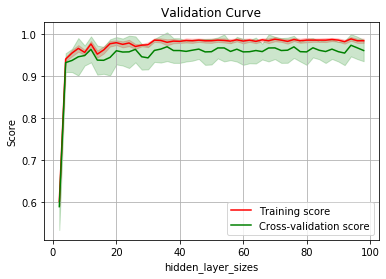

[(94, 0.9729309496473675),
 (36, 0.9694751082251083),
 (76, 0.9691163746484965),
 (82, 0.9669568674889895),
 (96, 0.9667717789456919),
 (70, 0.966685255043464),
 (52, 0.9666024393084743),
 (54, 0.9665765575004706),
 (68, 0.9664900335982425),
 (34, 0.9638401389894042),
 (46, 0.9637867043188264),
 (88, 0.9637867043188264),
 (58, 0.9635914828736049),
 (12, 0.9631505307908617),
 (26, 0.9631505307908617),
 (44, 0.9612196254449776),
 (74, 0.9611588411588411),
 (84, 0.9609709693291784),
 (32, 0.9606868131868133),
 (98, 0.9604309496473675),
 (64, 0.9604225921137687),
 (38, 0.9604213197034417),
 (72, 0.9604213197034417),
 (40, 0.9603347958012136),
 (20, 0.9598813000216309),
 (42, 0.9583898789220008),
 (56, 0.9582345508181118),
 (86, 0.9580393293728905),
 (66, 0.9578499354334966),
 (78, 0.9577017385599476),
 (90, 0.9577017385599476),
 (50, 0.957609292881032),
 (62, 0.9576055847137936),
 (24, 0.9572621781203872),
 (48, 0.9571520889342109),
 (60, 0.9571520889342109),
 (80, 0.9571520889342109),
 (2

In [435]:
mod_nn = MLPClassifier(max_iter = 100, activation = 'relu',solver='adam',random_state=1)

plot_validation_curve(mod_nn, X_train_scaled, y_train, param_name = "hidden_layer_sizes", param_range = np.arange(2,100,2))

Train Score Mean 0.8780270880730059
Test Score Mean 0.8623990704355148


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

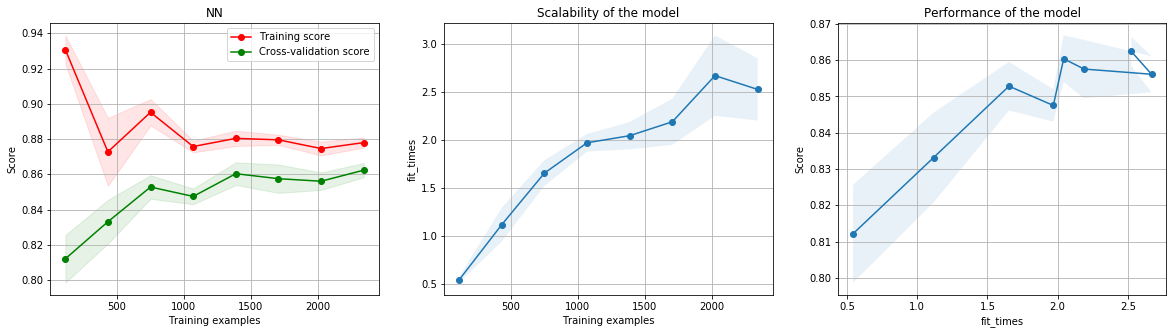

In [158]:

classifier = MLPClassifier(alpha = .7, hidden_layer_sizes=(16), max_iter=800,activation = 'relu',solver='adam',random_state=1)
plot_learning_curve(classifier, X_train_scaled, y_train, "NN")

Train Score Mean 0.8989444026479887
Test Score Mean 0.8650248810230682


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

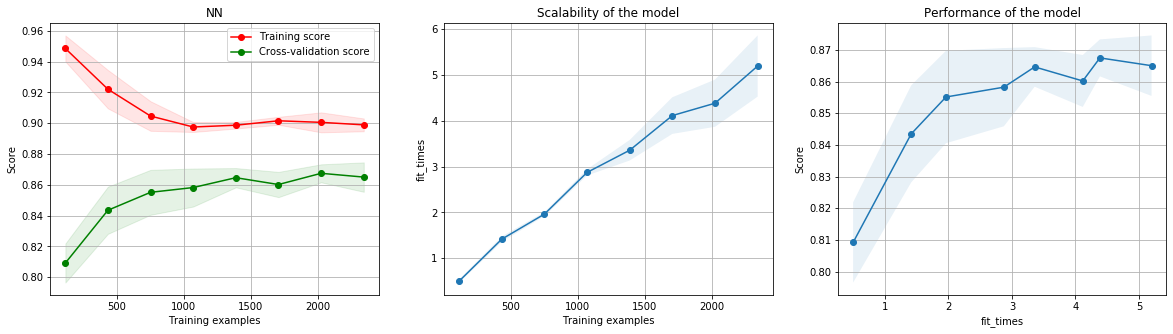

In [148]:
classifier = MLPClassifier(alpha = .01, hidden_layer_sizes=(10, 10), max_iter=500,activation = 'relu',solver='adam',random_state=1)
plot_learning_curve(classifier, X_train_scaled, y_train, "NN")

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (210) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/

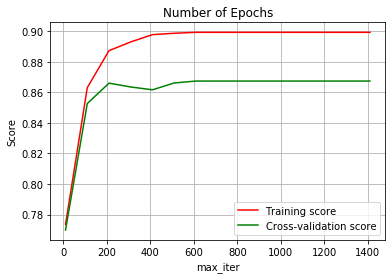

[(610, 0.867370272327135),
 (710, 0.867370272327135),
 (810, 0.867370272327135),
 (910, 0.867370272327135),
 (1010, 0.867370272327135),
 (1110, 0.867370272327135),
 (1210, 0.867370272327135),
 (1310, 0.867370272327135),
 (1410, 0.867370272327135),
 (510, 0.8661281000655598),
 (210, 0.8660097256409806),
 (310, 0.8634872073786152),
 (410, 0.8616479029841987),
 (110, 0.8526419648185094),
 (10, 0.7698814046626918)]

In [145]:
plot_validation_curve_nn(classifier, X_train, y_train, param_name = "max_iter", param_range = np.arange(10, 1500, 100), title = "Number of Epochs")


## Final NN

In [66]:

classifier = MLPClassifier( alpha = 1, activation = 'tanh', hidden_layer_sizes = (5,5), max_iter=260, random_state =1)
classifier.fit(X_train_scaled, y_train)
prediction=classifier.predict(X_test_scaled)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.f1_score(prediction,y_test)))
print(classification_report(prediction,y_test))

The balanced accuracy of the Decision Tree is 0.976
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (260) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [68]:
classifier = MLPClassifier( alpha = 0.01, activation = 'tanh', hidden_layer_sizes = (5,5), max_iter=275, random_state =1, solver = 'sgd'
                          , momentum = 0.978947)
classifier.fit(X_train_scaled, y_train)
prediction=classifier.predict(X_test_scaled)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.f1_score(prediction,y_test)))
print(classification_report(prediction,y_test))

The balanced accuracy of the Decision Tree is 0.976
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The balanced accuracy of the Decision Tree is 0.976
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Train Score Mean 0.9821613747292108
Test Score Mean 0.9699356478477179


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

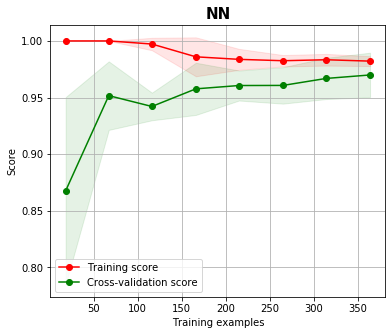

In [341]:
final_nn = MLPClassifier( alpha = 0.886, activation = 'tanh', hidden_layer_sizes = (5,5), max_iter=275, random_state =1, solver = 'sgd'
                          , momentum = 0.978947)
final_nn.fit(X_train_scaled, y_train)
prediction=final_nn.predict(X_test_scaled)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.f1_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(final_nn, X_train_scaled, y_train, "NN")

# Timing

In [216]:
estimators = [(final_dt, "Decision Tree"),
 (final_boosted_mod_dt, "Boosted Tree"),
(svc_rbf, "SVM RBF"),
(svc_linear, "SVM Linear"),
(knn_final, "KNN"),
(final_nn, "Neural Net")]

Decision Tree
Boosted Tree
SVM RBF
SVM Linear
KNN
Neural Net


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

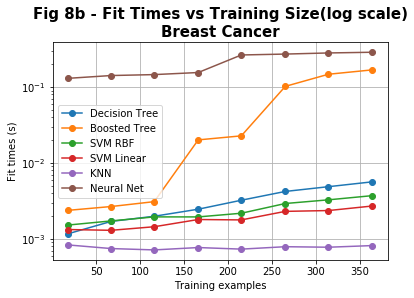

In [344]:
plot_timing_curves(
estimators, X_train_scaled, y_train, "Fig 8b - Fit Times vs Training Size(log scale)\nBreast Cancer")

In [241]:
import time

test_times = []
for estimator, name in estimators:
    start_time1 = time.time()
    estimator.fit(X_train_scaled, y_train)
    end_time1 = time.time()
    start_time2 = time.time()
    estimator.predict(X_test)
    end_time2 = time.time()
    test_times.append((name, (end_time1-start_time1),end_time2-start_time2))
    
test_times

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[('Decision Tree', 0.007386684417724609, 0.00016832351684570312),
 ('Boosted Tree', 0.20929694175720215, 0.003420114517211914),
 ('SVM RBF', 0.004446983337402344, 0.0013670921325683594),
 ('SVM Linear', 0.0041429996490478516, 0.00040912628173828125),
 ('KNN', 0.0003540515899658203, 0.0013387203216552734),
 ('Neural Net', 0.28246593475341797, 0.0003159046173095703)]

In [335]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_timing_curves(estimators, X, y,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.05, 1.0, 8), scoring = "f1", random_state =1):

#     if axes is None:
#         _, axes = plt.subplots(1, 3, figsize=(20, 5))

#     axes[0].set_title(title)
#     if ylim is not None:
#         axes[0].set_ylim(*ylim)
#     axes[0].set_xlabel("Training examples")
#     axes[0].set_ylabel("Score")
#     axes[0].grid()
#     axes[1].grid()
#     axes[2].grid()


    ax = plt.subplot()
    ax.grid()
    
    for estimator, name in estimators:
        print(name)
        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes,
                           return_times=True, random_state= random_state, scoring=scoring)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)

        # Plot learning curve
        
#         axes[0].plot(train_sizes, train_scores_mean, 'o-',
#                      label=name)
#         axes[0].legend(loc="best")

        # Plot n_samples vs fit_times
        
        ax.semilogy(train_sizes, fit_times_mean, 'o-', label = name)
        ax.set_xlabel("Training examples")
        ax.set_ylabel("Fit times (s)")
        ax.set_title(title,fontdict={'fontsize': 15, 'fontweight': 'heavy'} )
        ax.legend(loc="best")

        # Plot fit_time vs score
        
#         axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
#         axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
#                              test_scores_mean + test_scores_std, alpha=0.1)
#         axes[2].set_xlabel("fit_times")
#         axes[2].set_ylabel("Score")
#         axes[2].set_title("Performance of the model")

    plt.grid(True)
    return plt

In [199]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, X, y,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.05, 1.0, 8), scoring = "f1", random_state =1):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y,
                       train_sizes=train_sizes, scoring = scoring,
                       return_times=True, random_state = random_state, cv=cv, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    print("Train Score Mean " + str(train_scores_mean[-1]))
    print("Test Score Mean " + str(test_scores_mean[-1]))

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt
